## Importing Modules

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from prepareDF import PrepareDF
import warnings
warnings.filterwarnings('ignore')

# 1) Data Preperation
---

## Functions to use

In [236]:
def getInfo(df):
    print(
        df.info(),                                                      #Printing general information and statistics description of dataframe
        "\n--------------------------------------------------------",
        "\ntype:\t\t",
        type(df),
        "\nsize RxC:\t",
        df.shape,
        "\ncols dtypes:\n",
        df.dtypes,
        "\n--------\nStats\n--------\n",
        df.describe(),
        "\n########END########"
    )
    return df

## Getting Data

In [237]:
MovieData = PrepareDF(vis=1)
MovieData.set_index('show_id', inplace=True)
MovieData

type                          title               director  \
show_id                                                                  
s8         Movie                        Sankofa         [Haile Gerima]   
s9       TV Show  The Great British Baking Show      [Andy Devonshire]   
s10        Movie                   The Starling       [Theodore Melfi]   
s13        Movie                   Je Suis Karl  [Christian Schwochow]   
s28        Movie                      Grown Ups         [Dennis Dugan]   
...          ...                            ...                    ...   
s8800      Movie                          Zenda       [Avadhoot Gupte]   
s8802      Movie                        Zinzana      [Majid Al Ansari]   
s8803      Movie                         Zodiac        [David Fincher]   
s8805      Movie                     Zombieland      [Ruben Fleischer]   
s8807      Movie                         Zubaan          [Mozez Singh]   

                                                      cast  \
show_id                                                      
s8       [Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...   
s9       [Mel Giedroyc, Sue Perkins, Mary Berry, Paul H...   
s10      [Melissa McCarthy, Chris O'Dowd, Kevin Kline, ...   
s13      [Luna Wedler, Jannis Niewöhner, Milan Peschel,...   
s28      [Adam Sandler, Kevin James, Chris Rock, David ...   
...                                                    ...   
s8800    [Santosh Juvekar, Siddharth Chandekar, Sachit ...   
s8802    [Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri,...   
s8803    [Mark Ruffalo, Jake Gyllenhaal, Robert Downey ...   
s8805    [Jesse Eisenberg, Woody Harrelson, Emma Stone,...   
s8807    [Vicky Kaushal, Sarah-Jane Dias, Raaghav Chana...   

                                                   country  \
show_id                                                      
s8       [United States, Ghana, Burkina Faso, United Ki...   
s9                                        [United Kingdom]   
s10                                        [United States]   
s13                              [Germany, Czech Republic]   
s28                                        [United States]   
...                                                    ...   
s8800                                              [India]   
s8802                       [United Arab Emirates, Jordan]   
s8803                                      [United States]   
s8805                                      [United States]   
s8807                                              [India]   

                 date_added  release_year  rating   duration  \
show_id                                                        
s8       September 24, 2021          1993     7.0    125 min   
s9       September 24, 2021          2021     8.6  9 Seasons   
s10      September 24, 2021          2021     6.4    104 min   
s13      September 23, 2021          2021     5.5    127 min   
s28      September 20, 2021          2010     6.0    103 min   
...                     ...           ...     ...        ...   
s8800     February 15, 2018          2009     7.0    120 min   
s8802         March 9, 2016          2015     6.6     96 min   
s8803     November 20, 2019          2007     7.7    158 min   
s8805      November 1, 2019          2009     7.5     88 min   
s8807         March 2, 2019          2015     6.1    111 min   

                                                    genres  \
show_id                                                      
s8       [Dramas, Independent Movies, International Mov...   
s9                          [British TV Shows, Reality TV]   
s10                                     [Comedies, Dramas]   
s13                         [Dramas, International Movies]   
s28                                             [Comedies]   
...                                                    ...   
s8800                       [Dramas, International Movies]   
s8802            [Dramas, International Movi

### Dropping [description] and [title]

They are unstructured data that requires more complicated approaches to meainfully use like cnns. Furthermore, they have no implications as they are usually determined post-production: They are highly unlikely to factor in how the movie is rated.

In [238]:
MovieData.drop(columns=['description', 'title'], inplace=True)  
MovieData

type               director  \
show_id                                   
s8         Movie         [Haile Gerima]   
s9       TV Show      [Andy Devonshire]   
s10        Movie       [Theodore Melfi]   
s13        Movie  [Christian Schwochow]   
s28        Movie         [Dennis Dugan]   
...          ...                    ...   
s8800      Movie       [Avadhoot Gupte]   
s8802      Movie      [Majid Al Ansari]   
s8803      Movie        [David Fincher]   
s8805      Movie      [Ruben Fleischer]   
s8807      Movie          [Mozez Singh]   

                                                      cast  \
show_id                                                      
s8       [Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...   
s9       [Mel Giedroyc, Sue Perkins, Mary Berry, Paul H...   
s10      [Melissa McCarthy, Chris O'Dowd, Kevin Kline, ...   
s13      [Luna Wedler, Jannis Niewöhner, Milan Peschel,...   
s28      [Adam Sandler, Kevin James, Chris Rock, David ...   
...                                                    ...   
s8800    [Santosh Juvekar, Siddharth Chandekar, Sachit ...   
s8802    [Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri,...   
s8803    [Mark Ruffalo, Jake Gyllenhaal, Robert Downey ...   
s8805    [Jesse Eisenberg, Woody Harrelson, Emma Stone,...   
s8807    [Vicky Kaushal, Sarah-Jane Dias, Raaghav Chana...   

                                                   country  \
show_id                                                      
s8       [United States, Ghana, Burkina Faso, United Ki...   
s9                                        [United Kingdom]   
s10                                        [United States]   
s13                              [Germany, Czech Republic]   
s28                                        [United States]   
...                                                    ...   
s8800                                              [India]   
s8802                       [United Arab Emirates, Jordan]   
s8803                                      [United States]   
s8805                                      [United States]   
s8807                                              [India]   

                 date_added  release_year  rating   duration  \
show_id                                                        
s8       September 24, 2021          1993     7.0    125 min   
s9       September 24, 2021          2021     8.6  9 Seasons   
s10      September 24, 2021          2021     6.4    104 min   
s13      September 23, 2021          2021     5.5    127 min   
s28      September 20, 2021          2010     6.0    103 min   
...                     ...           ...     ...        ...   
s8800     February 15, 2018          2009     7.0    120 min   
s8802         March 9, 2016          2015     6.6     96 min   
s8803     November 20, 2019          2007     7.7    158 min   
s8805      November 1, 2019          2009     7.5     88 min   
s8807         March 2, 2019          2015     6.1    111 min   

                                                    genres aud_cat  
show_id                                                             
s8       [Dramas, Independent Movies, International Mov...   TV-MA  
s9                          [British TV Shows, Reality TV]   TV-14  
s10                                     [Comedies, Dramas]   PG-13  
s13                         [Dramas, International Movies]   TV-MA  
s28                                             [Comedies]   PG-13  
...                                                    ...     ...  
s8800                       [Dramas, International Movies]   TV-14  
s8802            [Dramas, International Movies, Thrillers]   TV-MA  
s8803                     [Cult Movies, Dramas, Thrillers]       R  
s8805                            [Comedies, Horror Movies]       R  
s8807     [Dramas, International Movies, Music & Musicals]   TV-14  

[4955 rows x 10 columns]

# 2) Model Predictor and Response Selection
---

## -> Response Variable: [rating]

## -> Choosing Predictors

### 2a) Non-Array Value Predictors: [date_added], [release_year], [duration], [type]

### Functions to use

In [239]:
def uniVarViz(df, column):                                                  #Function for univariate standard statistical description of single variable 
    series = df[column]
    f, axes = plt.subplots(5, 1, figsize=(24, 20))

    sb.boxplot(data = series, orient = "h", ax = axes[0])                   #Standard Boxplot and Histplot KDEs
    sb.histplot(data = series, kde=True, ax = axes[1])
    sb.violinplot(data = series, orient = "h", ax = axes[2])
    sb.countplot(data=df, y=column, ax=axes[3], native_scale=True)
    sb.swarmplot(data=df, x=column, ax=axes[4], native_scale=True)

    statsum = df[[column]].describe()
    print(
        '\n-------\nStatistical Description:\n-------\n',
        statsum
        )    
    fstat = plt.figure(figsize=(5, 5))
    sb.heatmap(statsum, linewidths = 1, annot = True, annot_kws = {'size': 9}, cmap = 'BuGn', fmt='g')

    return series

def multiUniVarViz(df, columns=0, group=0):                                 #Function for univariate standard statistical description of multiple variables 
    if(columns==0): columns=df.columns.to_list()                            #columns=0 for all columns selected
    dataHandled = df[columns]

    nrows=len(columns)
    if(group): nrows -= 1 
    f, axes = plt.subplots(nrows, 5, figsize = (80,6*nrows)) 

    if(group): 
        sb.boxplot(data = dataHandled[group], orient = "h", ax = axes[0,0])                
        sb.violinplot(data = dataHandled[group], orient = "h", ax = axes[0,1])
        sb.histplot(data = dataHandled[group], kde=True, ax = axes[0,2])
        sb.countplot(data = dataHandled[group], orient = "h", ax=axes[0,3], native_scale=True)
        sb.stripplot(data = dataHandled[group], orient = "h", ax=axes[0,4])
        nongroupData = dataHandled.drop(columns=group)
        nongroupcolumns = nongroupData.columns.to_list()
    else: 
        nongroupData = dataHandled
        nongroupcolumns = columns

    for i, column in enumerate(nongroupcolumns):
        if(group): i += 1 
        if(nrows!=1): 
            axesHandled = [
            axes[i,0],
            axes[i,1],
            axes[i,2],
            axes[i,3],
            axes[i,4]
            ]
        else: 
            axesHandled = [
            axes[0],
            axes[1],
            axes[2],
            axes[3],
            axes[4]
            ]
        sb.boxplot(data = nongroupData, x=column, orient = "h", ax = axesHandled[0])                
        sb.violinplot(data = nongroupData, x=column, ax = axesHandled[1])
        sb.histplot(data = nongroupData, x=column, kde=True, ax = axesHandled[2])
        sb.countplot(data = nongroupData, y=column, ax=axesHandled[3], native_scale=True)
        sb.stripplot(data = nongroupData, x=column, ax=axesHandled[4])
                                                                            
    statsum = df[columns].describe()                                       #Univariate Stats Summary
    print(
        '\n-------\nStatistical Description:\n-------\n',
        statsum
        )    
    fstat = plt.figure(figsize=(5, 5))
    sb.heatmap(statsum, linewidths = 1, annot = True, annot_kws = {'size': 9}, cmap = 'BuGn', fmt='g')

    return df[columns]

def multivarViz(df, columns=0, responseVar=0):                              #Function for multivatiate (Correlation) statistical description of multiple variables as numeric variables
    if(columns==0): columns=df.columns.to_list()
    lencols=len(columns)
    dataHandled = df[columns]
    
    statsum = dataHandled.describe()                                       #Univariate Stats Summary
    print(
        '\n-------\nStatistical Description:\n-------\n',
        statsum
        )    
    fstat = plt.figure(figsize=(5, 5))
    sb.heatmap(statsum, linewidths = 1, annot = True, annot_kws = {'size': 9}, cmap = 'BuGn', fmt='g')

    numData = dataHandled.select_dtypes(exclude=['object'])
    numEmpty = numData.empty
    if(responseVar and responseVar not in numData.columns.to_list()):
        numData = pd.concat([numData, dataHandled[responseVar]],axis=1)
    numcols = numData.columns.to_list()
    lennumcols = len(numcols)

    catData = dataHandled.select_dtypes(include=['object'])
    catEmpty = catData.empty
    if(responseVar and responseVar not in catData.columns.to_list()):
        catData = pd.concat([catData, dataHandled[responseVar]],axis=1)
    catcols = catData.columns.to_list()
    lencatcols = len(catcols)
    
    if(not catEmpty):
        sb.pairplot(catData, vars=catData.columns.to_list())
        if(responseVar): 
            f, axes = plt.subplots(1, lencatcols-1, figsize = (16*(lencatcols-1), 16))
            predictors = catcols.copy()
            predictors.remove(responseVar)

            predictormediansort = {}
            for predictor in predictors:
                responseMedian = catData.groupby(predictor)[responseVar].median()
                sortedbyMedian = responseMedian.sort_values(ascending=True).index.to_list()
                predictormediansort[predictor] = sortedbyMedian
        
            if(lencatcols<=2): 
                column = predictors[0]
                sb.stripplot(data=catData, x=column, y=responseVar, order=predictormediansort[column], hue=responseVar)
            else:
                for i, column in enumerate(predictors):
                    sb.stripplot(data=catData, x=column, y=responseVar, order=predictormediansort[column], hue=responseVar, ax=axes[i])

    if(not numEmpty):
        corrMat = numData.corr()
        fheat = plt.figure(figsize=(8, 8))
        sb.heatmap(corrMat, vmin = -1, vmax = 1, annot = True, fmt = ".2f")
        sb.pairplot(numData)

        if(responseVar==0): return dataHandled
        f, axes = plt.subplots(1, lennumcols-1, figsize = (4*(lennumcols-1), 4))
        predictors = numcols.copy()
        predictors.remove(responseVar)

        if(lennumcols<=2): 
            column = predictors[0]
            sb.scatterplot(data=numData, x=column, y=responseVar, hue=responseVar)
            return dataHandled
        for i, column in enumerate(predictors):
            sb.scatterplot(data=numData, x=column, y=responseVar, hue=responseVar, ax=axes[i])        

    return dataHandled

def Movie_TVSplitter(df):                                       #Returns 2 datafranes of type, rating, and duration based on 2 type: Movie and TV Show
    dfMov =  df[df['type'] == 'Movie'].drop(columns='type')
    dfTV =  df[df['type'] == 'TV Show'].drop(columns='type')

    dfsFiltered = {}                                          #Formatting to dict of {type:dataframe of type, rating, and duration}
    dfsFiltredKeys = ['Movie', 'TV Show']
    dfsFiltredVals = [dfMov, dfTV]
    for dfsFiltredKey, dfsFiltredVal in zip(dfsFiltredKeys, dfsFiltredVals):
        dfsFiltered[dfsFiltredKey] = dfsFiltredVal

    indexRemMov = df[                                       #Ensuring all only TV Show and Movie values exists for type
        (df['type'] == 'Movie')
        ].index
    indexRemTV = df[
        (df['type'] == 'TV Show')
        ].index
    testDF = df.copy()
    testDF.drop(indexRemMov, inplace=True)
    testDF.drop(indexRemTV, inplace=True)
    
    if(testDF.shape[0]==0): return dfsFiltered    

#### 2a.1) Numeric or Reasonably Continous Predictors: [date_added], [release_year], [year_dlt]

##### 2.a.1.1) Preparing dataset

In [240]:
MovieNum = MovieData.copy()                                                                          
MovieNum.drop(columns=['director', 'cast', 'genres', 'country', 'aud_cat'], inplace=True)     #dropping unused columns
MovieNum.drop(columns=['duration', 'type'], inplace=True)                                     #dropping duration and type for now because units are not the same across type
getInfo(MovieNum)

<class 'pandas.core.frame.DataFrame'>
Index: 4955 entries, s8 to s8807
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date_added    4955 non-null   object 
 1   release_year  4955 non-null   int64  
 2   rating        4955 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 154.8+ KB
None 
-------------------------------------------------------- 
type:		 <class 'pandas.core.frame.DataFrame'> 
size RxC:	 (4955, 3) 
cols dtypes:
 date_added       object
release_year      int64
rating          float64
dtype: object 
--------
Stats
--------
        release_year       rating
count   4955.000000  4955.000000
mean    2012.667810     6.260202
std        9.677743     1.171019
min     1942.000000     1.500000
25%     2011.000000     5.600000
50%     2016.000000     6.400000
75%     2018.000000     7.100000
max     2021.000000     9.600000 
########END########


date_added  release_year  rating
show_id                                          
s8       September 24, 2021          1993     7.0
s9       September 24, 2021          2021     8.6
s10      September 24, 2021          2021     6.4
s13      September 23, 2021          2021     5.5
s28      September 20, 2021          2010     6.0
...                     ...           ...     ...
s8800     February 15, 2018          2009     7.0
s8802         March 9, 2016          2015     6.6
s8803     November 20, 2019          2007     7.7
s8805      November 1, 2019          2009     7.5
s8807         March 2, 2019          2015     6.1

[4955 rows x 3 columns]

-> Data Formatting

date_added is converted to year_added where only the year is modelled to reduce excessive resolution (too many entries not very good for training)

In [241]:
MovieNum['year_added'] = MovieNum['date_added'].apply(lambda x: x[-4:])                 #considering only the year for date to reduce the ammount uniqe entries
MovieNum.drop(columns='date_added', inplace=True)
getInfo(MovieNum)

<class 'pandas.core.frame.DataFrame'>
Index: 4955 entries, s8 to s8807
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   release_year  4955 non-null   int64  
 1   rating        4955 non-null   float64
 2   year_added    4955 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 154.8+ KB
None 
-------------------------------------------------------- 
type:		 <class 'pandas.core.frame.DataFrame'> 
size RxC:	 (4955, 3) 
cols dtypes:
 release_year      int64
rating          float64
year_added       object
dtype: object 
--------
Stats
--------
        release_year       rating
count   4955.000000  4955.000000
mean    2012.667810     6.260202
std        9.677743     1.171019
min     1942.000000     1.500000
25%     2011.000000     5.600000
50%     2016.000000     6.400000
75%     2018.000000     7.100000
max     2021.000000     9.600000 
########END########


release_year  rating year_added
show_id                                 
s8               1993     7.0       2021
s9               2021     8.6       2021
s10              2021     6.4       2021
s13              2021     5.5       2021
s28              2010     6.0       2021
...               ...     ...        ...
s8800            2009     7.0       2018
s8802            2015     6.6       2016
s8803            2007     7.7       2019
s8805            2009     7.5       2019
s8807            2015     6.1       2019

[4955 rows x 3 columns]

-> dtype Manipulation

Converting columns to intiger (Although year is discountinous, large range is easier to visualize in approximation to a continous variable)

In [242]:
print('Default:\n', MovieNum.dtypes)
MovieNumDtypes = {
    'release_year': int,
    'year_added': int,
    'rating': float
}
MovieNum = MovieNum.astype(MovieNumDtypes, copy=False)
print('\nConverted:\n', MovieNum.dtypes)

Default:
 release_year      int64
rating          float64
year_added       object
dtype: object

Converted:
 release_year      int64
rating          float64
year_added        int64
dtype: object


-> Additional Data Derrivation

Creating year_dlt column of difference between year_added and release_year as an additional datapoint

In [243]:
MovieNum['year_dlt']=MovieNum.apply(lambda x: (x['year_added']-x['release_year']), axis=1)
MovieNum

release_year  rating  year_added  year_dlt
show_id                                            
s8               1993     7.0        2021      28.0
s9               2021     8.6        2021       0.0
s10              2021     6.4        2021       0.0
s13              2021     5.5        2021       0.0
s28              2010     6.0        2021      11.0
...               ...     ...         ...       ...
s8800            2009     7.0        2018       9.0
s8802            2015     6.6        2016       1.0
s8803            2007     7.7        2019      12.0
s8805            2009     7.5        2019      10.0
s8807            2015     6.1        2019       4.0

[4955 rows x 4 columns]

##### 2.a.1.2) Exploration


-------
Statistical Description:
-------
        release_year       rating   year_added     year_dlt
count   4955.000000  4955.000000  4955.000000  4955.000000
mean    2012.667810     6.260202  2018.834309     6.166498
std        9.677743     1.171019     1.546413     9.783812
min     1942.000000     1.500000  2008.000000    -3.000000
25%     2011.000000     5.600000  2018.000000     0.000000
50%     2016.000000     6.400000  2019.000000     2.000000
75%     2018.000000     7.100000  2020.000000     8.000000
max     2021.000000     9.600000  2021.000000    75.000000


release_year  rating  year_added  year_dlt
show_id                                            
s8               1993     7.0        2021      28.0
s9               2021     8.6        2021       0.0
s10              2021     6.4        2021       0.0
s13              2021     5.5        2021       0.0
s28              2010     6.0        2021      11.0
...               ...     ...         ...       ...
s8800            2009     7.0        2018       9.0
s8802            2015     6.6        2016       1.0
s8803            2007     7.7        2019      12.0
s8805            2009     7.5        2019      10.0
s8807            2015     6.1        2019       4.0

[4955 rows x 4 columns]

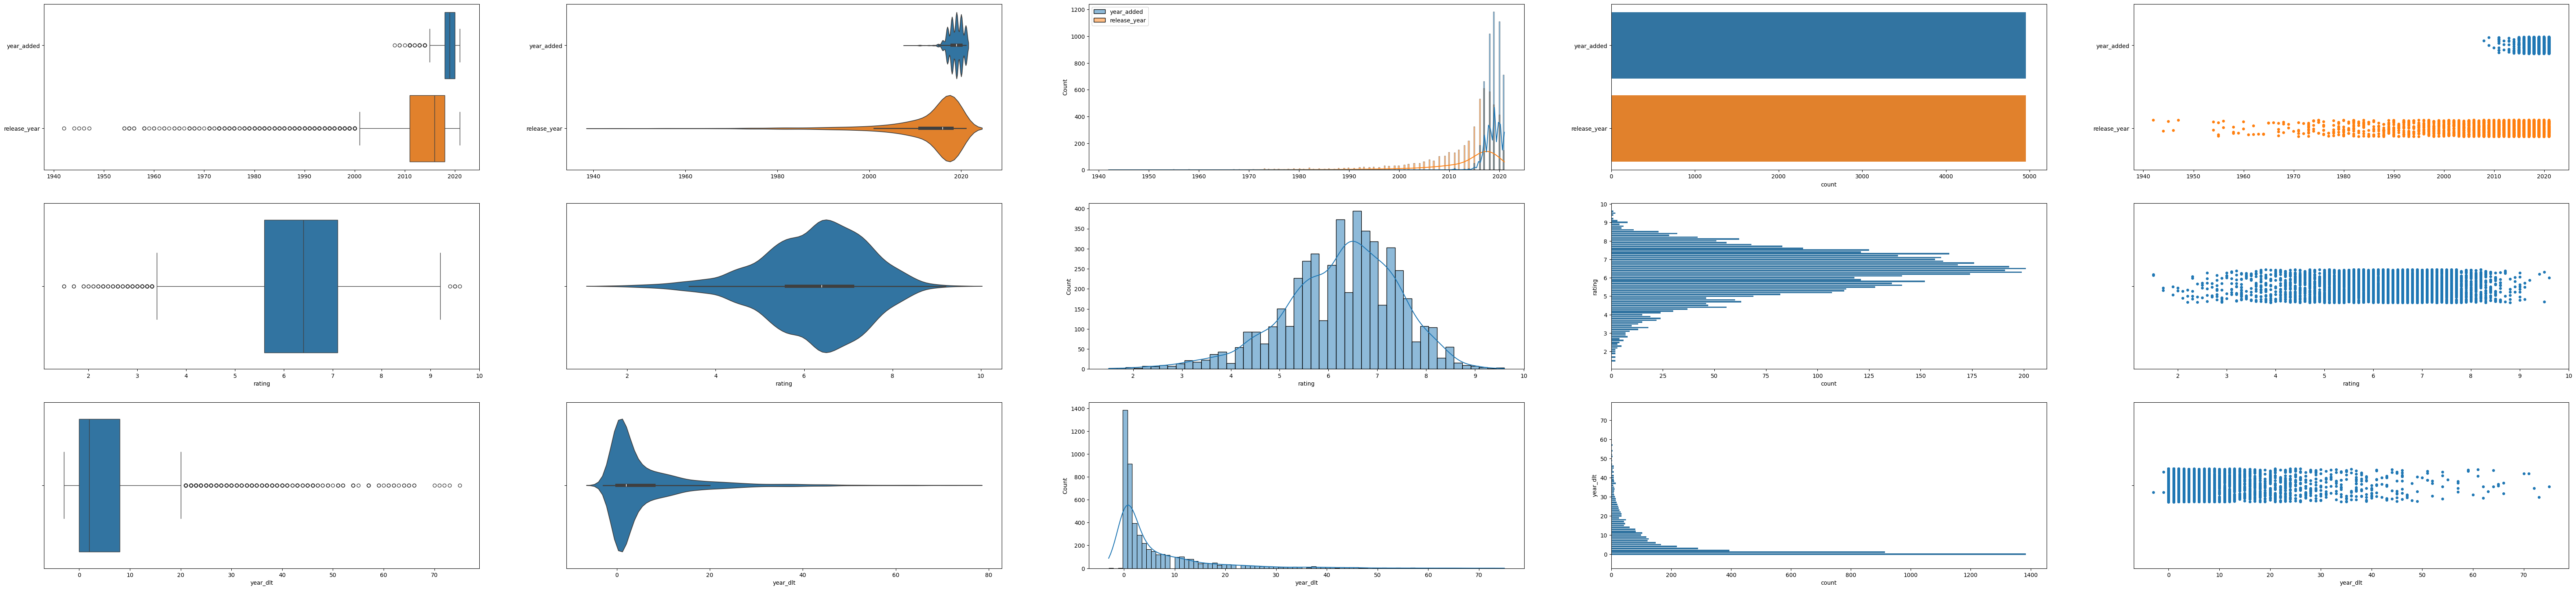

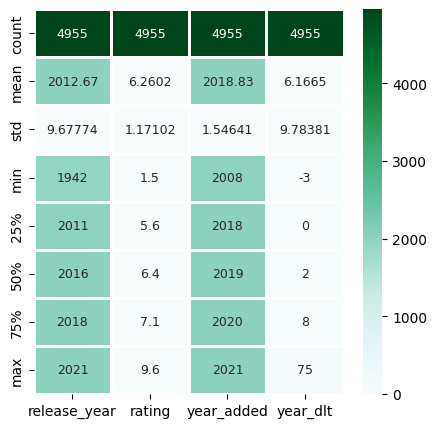

In [244]:
multiUniVarViz(MovieNum, group=['year_added', 'release_year'])


-------
Statistical Description:
-------
        release_year       rating   year_added     year_dlt
count   4955.000000  4955.000000  4955.000000  4955.000000
mean    2012.667810     6.260202  2018.834309     6.166498
std        9.677743     1.171019     1.546413     9.783812
min     1942.000000     1.500000  2008.000000    -3.000000
25%     2011.000000     5.600000  2018.000000     0.000000
50%     2016.000000     6.400000  2019.000000     2.000000
75%     2018.000000     7.100000  2020.000000     8.000000
max     2021.000000     9.600000  2021.000000    75.000000


release_year  rating  year_added  year_dlt
show_id                                            
s8               1993     7.0        2021      28.0
s9               2021     8.6        2021       0.0
s10              2021     6.4        2021       0.0
s13              2021     5.5        2021       0.0
s28              2010     6.0        2021      11.0
...               ...     ...         ...       ...
s8800            2009     7.0        2018       9.0
s8802            2015     6.6        2016       1.0
s8803            2007     7.7        2019      12.0
s8805            2009     7.5        2019      10.0
s8807            2015     6.1        2019       4.0

[4955 rows x 4 columns]

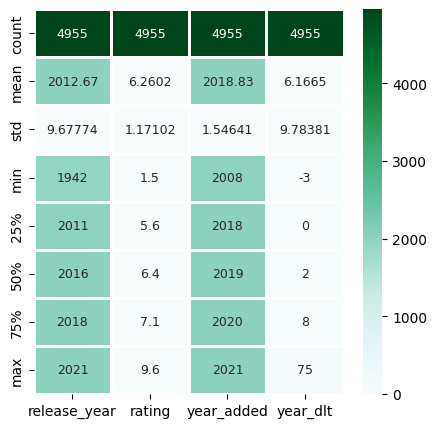

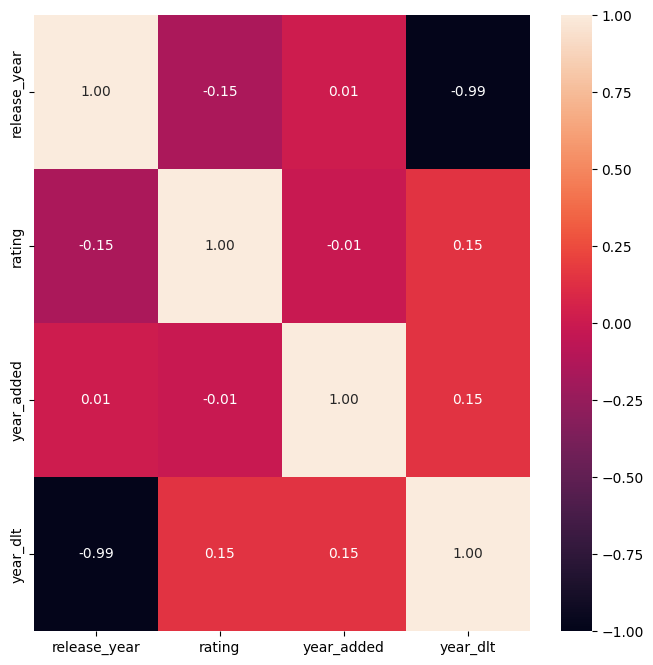

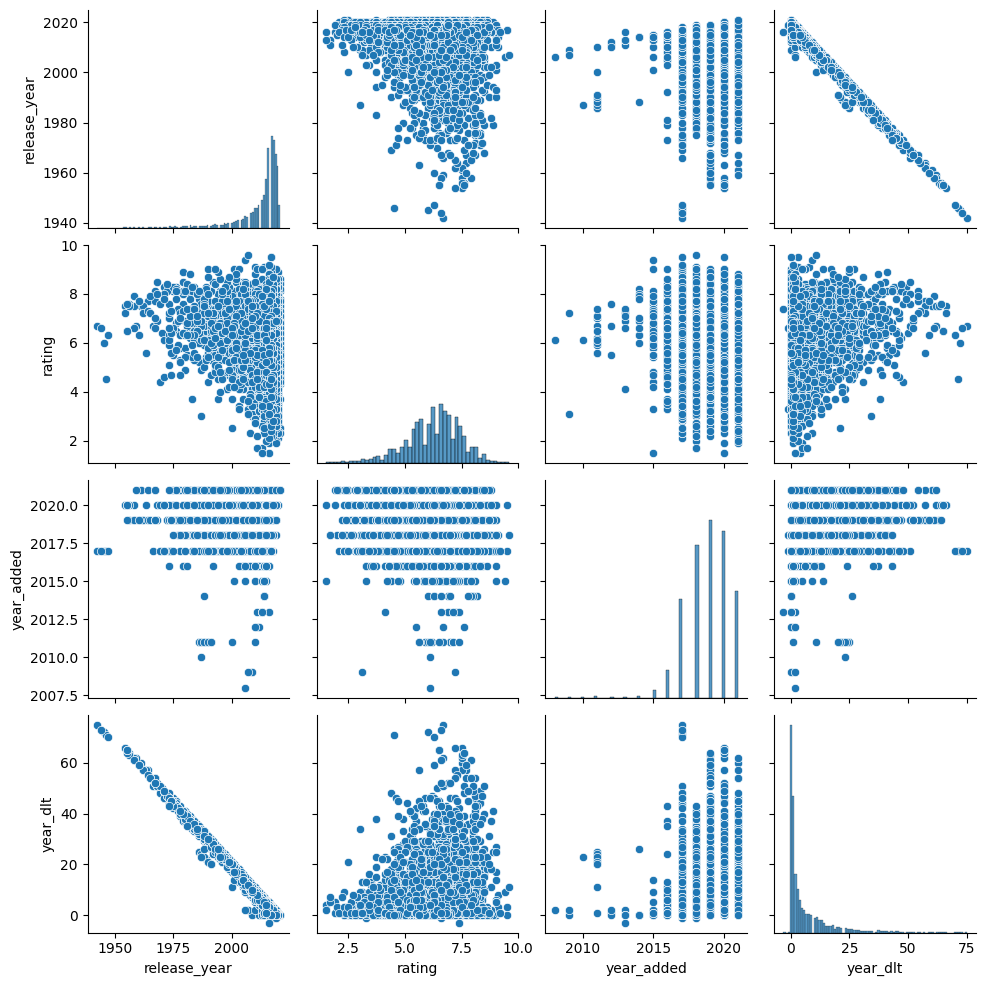

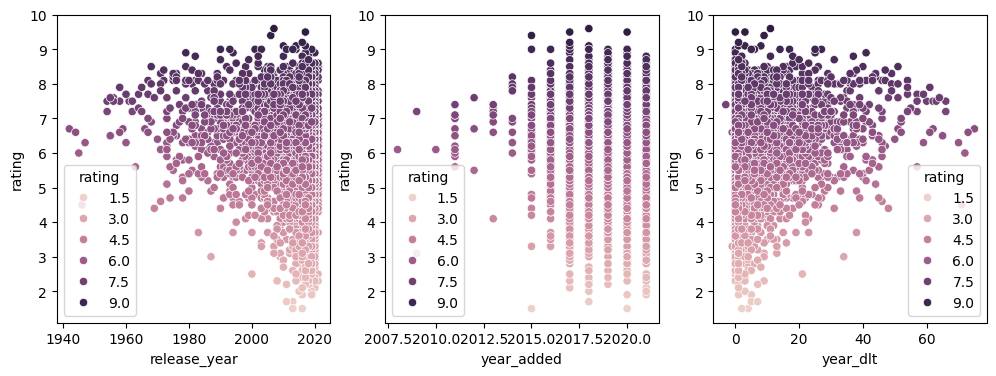

In [245]:
multivarViz(MovieNum, responseVar = 'rating')

#### As there are no significant correlation, we excluded the use of [date_added], [release_year], and [year_dlt] values for this prediction
---

#### 2a.2) Categorical Predictors: [type], [aud_cat]

##### 2.a.2.1) Preparing dataset

In [246]:
MovieCat = MovieData.copy()                                                                          
MovieCat.drop(columns=['director', 'cast', 'genres', 'country', 'date_added', 'release_year', 'duration'], inplace=True)     #dropping unused columns
getInfo(MovieCat)                                                                                                            #checking dtype

<class 'pandas.core.frame.DataFrame'>
Index: 4955 entries, s8 to s8807
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   type     4955 non-null   object 
 1   rating   4955 non-null   float64
 2   aud_cat  4955 non-null   object 
dtypes: float64(1), object(2)
memory usage: 283.9+ KB
None 
-------------------------------------------------------- 
type:		 <class 'pandas.core.frame.DataFrame'> 
size RxC:	 (4955, 3) 
cols dtypes:
 type        object
rating     float64
aud_cat     object
dtype: object 
--------
Stats
--------
             rating
count  4955.000000
mean      6.260202
std       1.171019
min       1.500000
25%       5.600000
50%       6.400000
75%       7.100000
max       9.600000 
########END########


type  rating aud_cat
show_id                         
s8         Movie     7.0   TV-MA
s9       TV Show     8.6   TV-14
s10        Movie     6.4   PG-13
s13        Movie     5.5   TV-MA
s28        Movie     6.0   PG-13
...          ...     ...     ...
s8800      Movie     7.0   TV-14
s8802      Movie     6.6   TV-MA
s8803      Movie     7.7       R
s8805      Movie     7.5       R
s8807      Movie     6.1   TV-14

[4955 rows x 3 columns]

dtypes in order

-> Additional Data Derrivation

Binary Encoding of [type] as a intiger (binary variable) 0:Movie and 1:TV Show to allow for correlation visualizations for continous variables for approximation

In [247]:
def binTypeConverter(row):                                                                                                     #converting to binary where 2:Movie and 1:TV Show
    if(row=='Movie'): return 0
    return 1

MovieCat['type_bin']=MovieCat.apply(lambda x: binTypeConverter(x['type']), axis=1)

getInfo(MovieCat)

<class 'pandas.core.frame.DataFrame'>
Index: 4955 entries, s8 to s8807
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   type      4955 non-null   object 
 1   rating    4955 non-null   float64
 2   aud_cat   4955 non-null   object 
 3   type_bin  4955 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 322.6+ KB
None 
-------------------------------------------------------- 
type:		 <class 'pandas.core.frame.DataFrame'> 
size RxC:	 (4955, 4) 
cols dtypes:
 type         object
rating      float64
aud_cat      object
type_bin      int64
dtype: object 
--------
Stats
--------
             rating     type_bin
count  4955.000000  4955.000000
mean      6.260202     0.027043
std       1.171019     0.162226
min       1.500000     0.000000
25%       5.600000     0.000000
50%       6.400000     0.000000
75%       7.100000     0.000000
max       9.600000     1.000000 
########END########


type  rating aud_cat  type_bin
show_id                                   
s8         Movie     7.0   TV-MA         0
s9       TV Show     8.6   TV-14         1
s10        Movie     6.4   PG-13         0
s13        Movie     5.5   TV-MA         0
s28        Movie     6.0   PG-13         0
...          ...     ...     ...       ...
s8800      Movie     7.0   TV-14         0
s8802      Movie     6.6   TV-MA         0
s8803      Movie     7.7       R         0
s8805      Movie     7.5       R         0
s8807      Movie     6.1   TV-14         0

[4955 rows x 4 columns]

##### 2.a.2.2) Exploration


-------
Statistical Description:
-------
             rating
count  4955.000000
mean      6.260202
std       1.171019
min       1.500000
25%       5.600000
50%       6.400000
75%       7.100000
max       9.600000


type aud_cat  rating
show_id                         
s8         Movie   TV-MA     7.0
s9       TV Show   TV-14     8.6
s10        Movie   PG-13     6.4
s13        Movie   TV-MA     5.5
s28        Movie   PG-13     6.0
...          ...     ...     ...
s8800      Movie   TV-14     7.0
s8802      Movie   TV-MA     6.6
s8803      Movie       R     7.7
s8805      Movie       R     7.5
s8807      Movie   TV-14     6.1

[4955 rows x 3 columns]

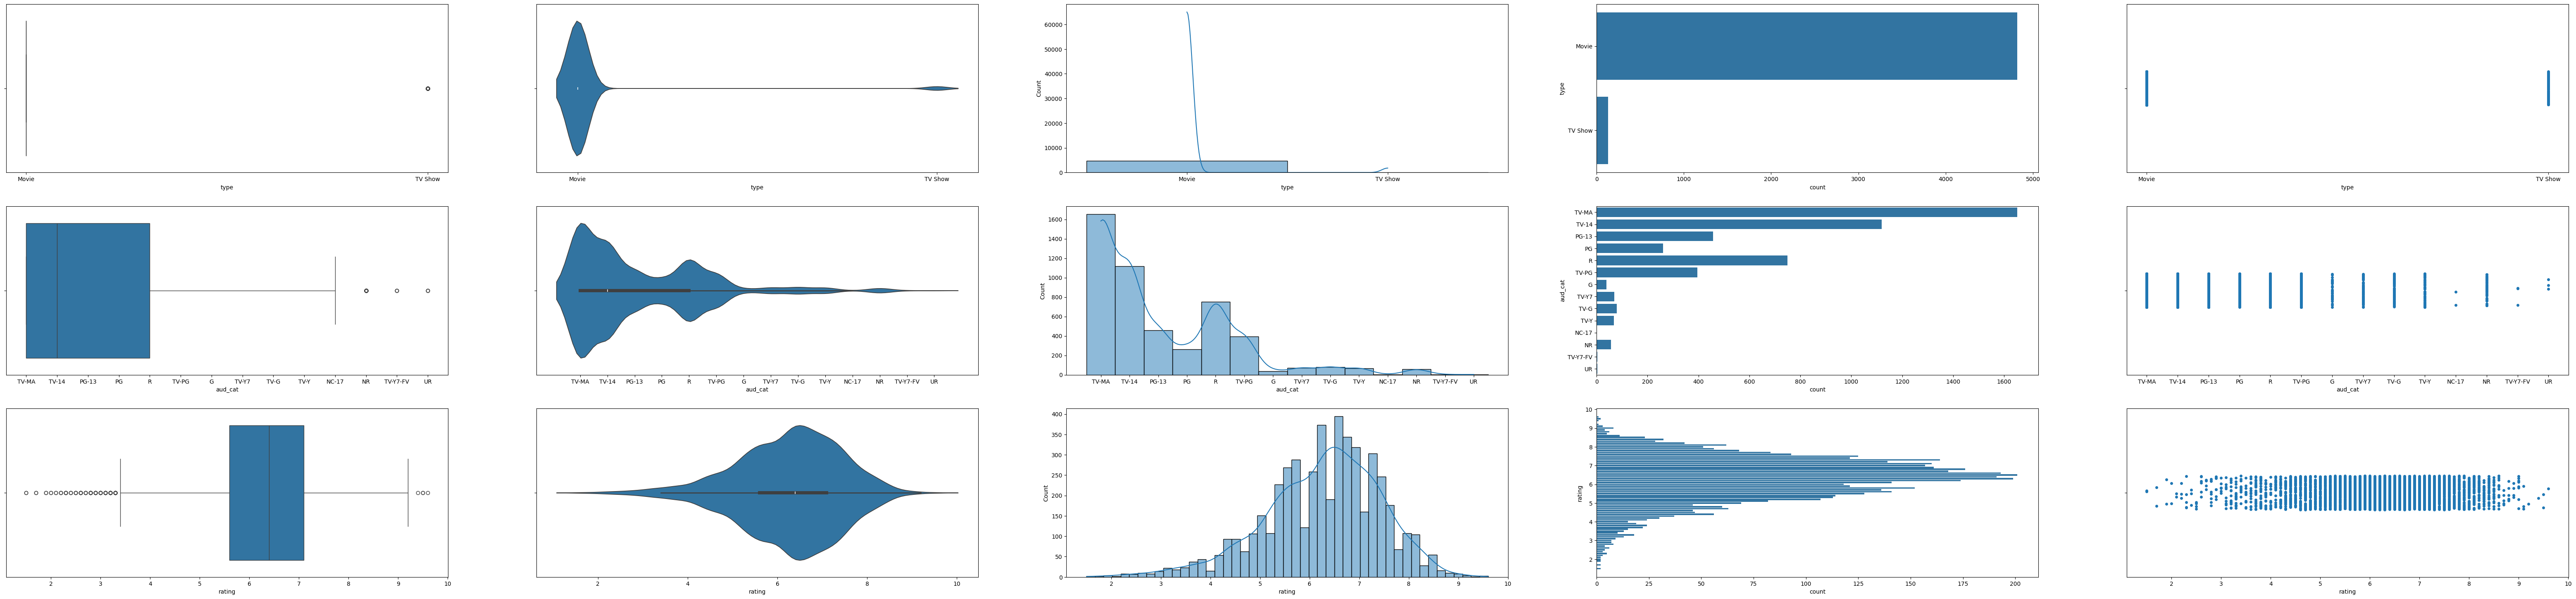

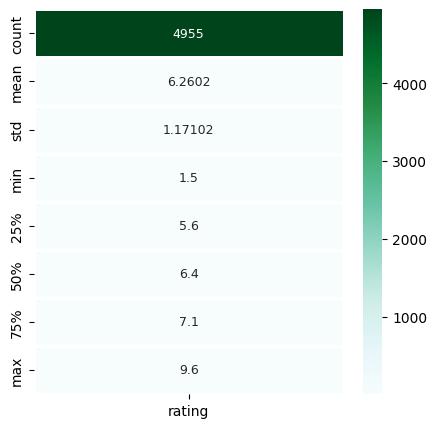

In [248]:
multiUniVarViz(MovieCat, ['type', 'aud_cat', 'rating'])

Binary Encoding for [type]


-------
Statistical Description:
-------
             rating     type_bin
count  4955.000000  4955.000000
mean      6.260202     0.027043
std       1.171019     0.162226
min       1.500000     0.000000
25%       5.600000     0.000000
50%       6.400000     0.000000
75%       7.100000     0.000000
max       9.600000     1.000000


rating  type_bin aud_cat
show_id                          
s8          7.0         0   TV-MA
s9          8.6         1   TV-14
s10         6.4         0   PG-13
s13         5.5         0   TV-MA
s28         6.0         0   PG-13
...         ...       ...     ...
s8800       7.0         0   TV-14
s8802       6.6         0   TV-MA
s8803       7.7         0       R
s8805       7.5         0       R
s8807       6.1         0   TV-14

[4955 rows x 3 columns]

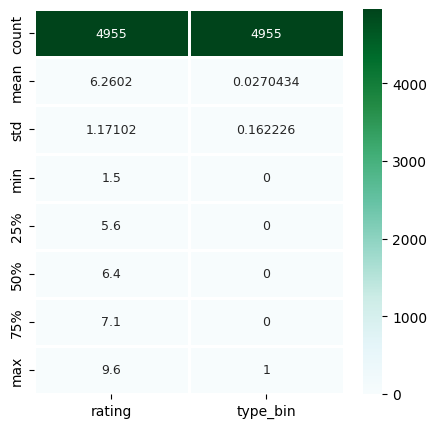

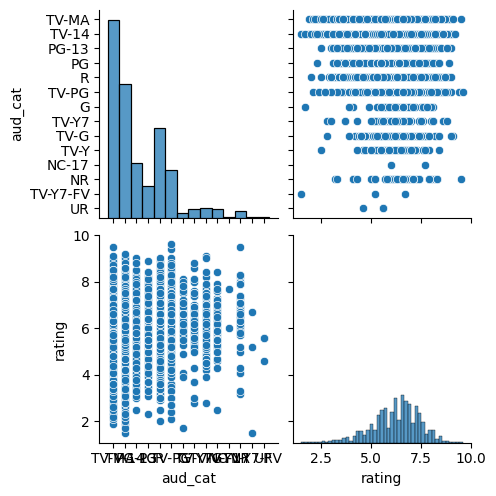

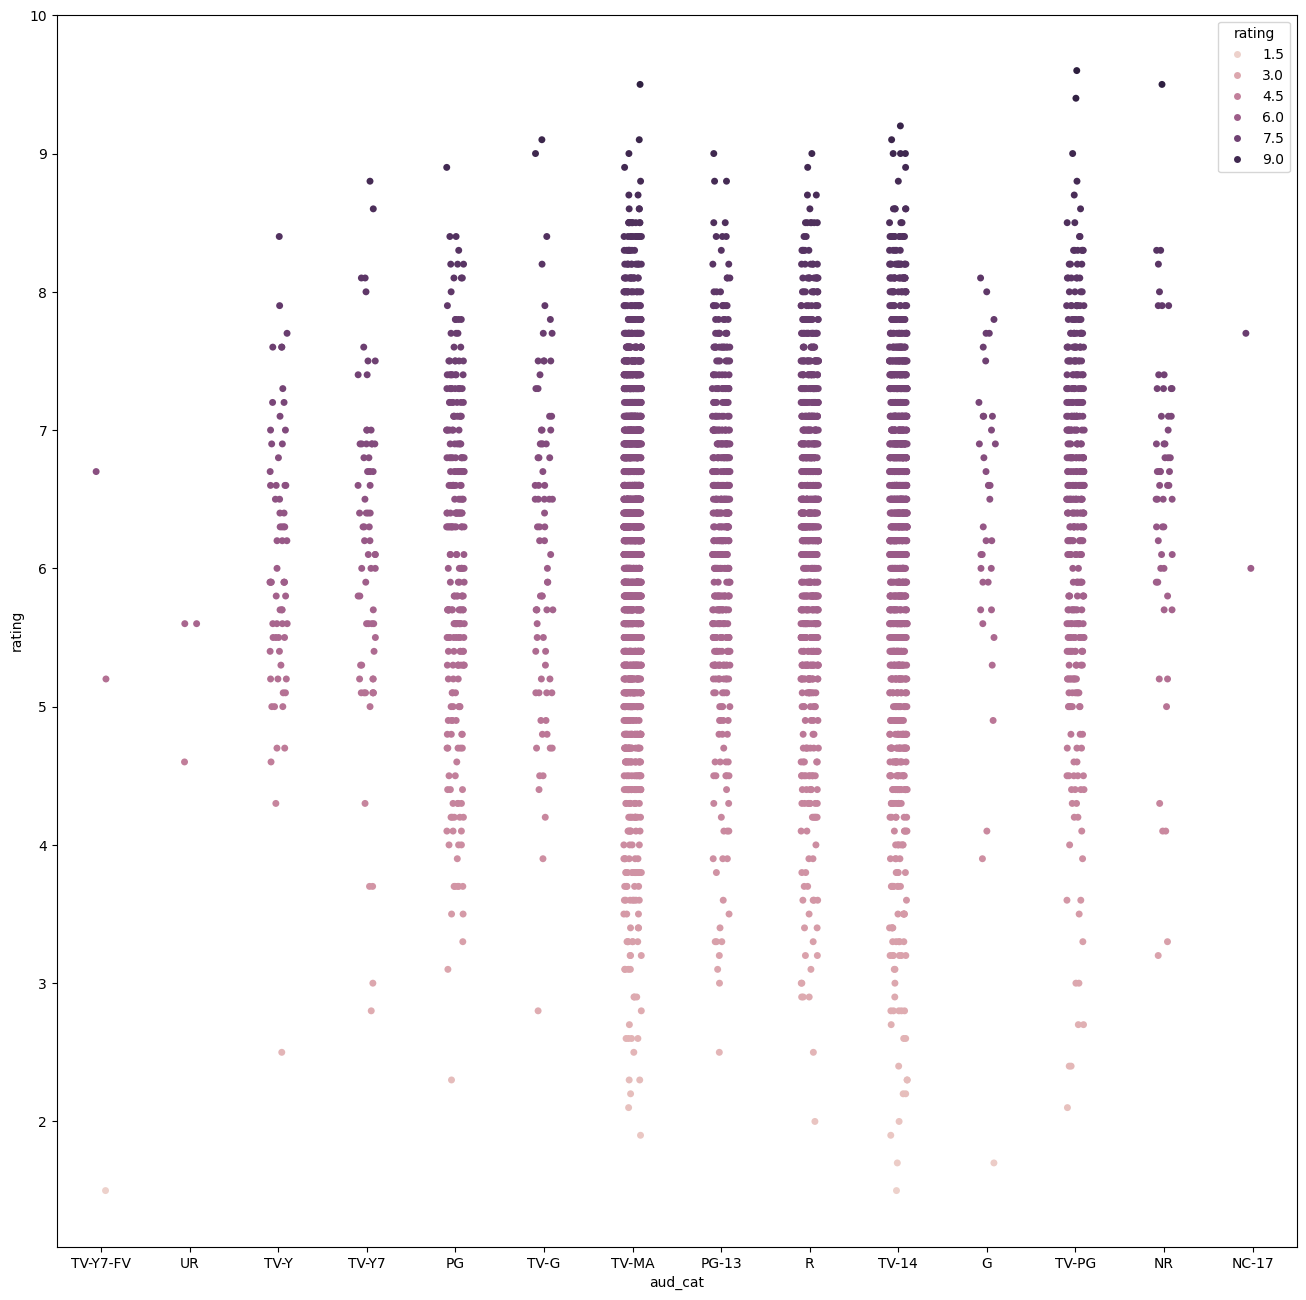

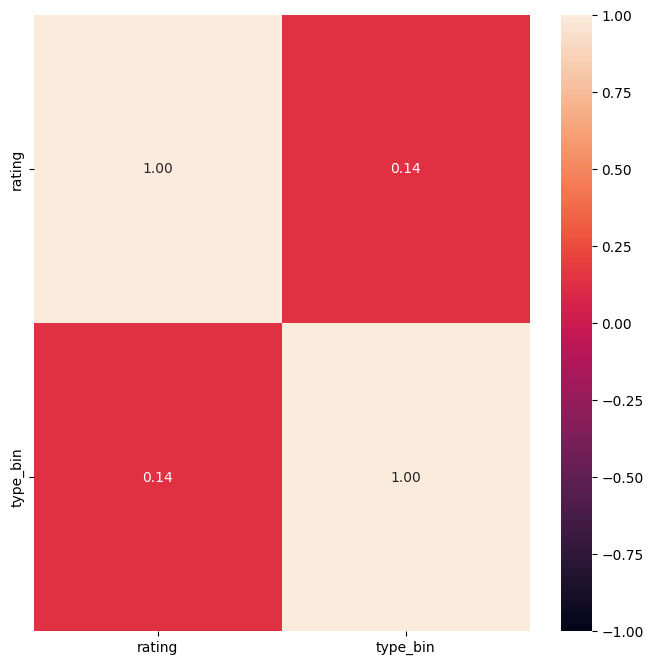

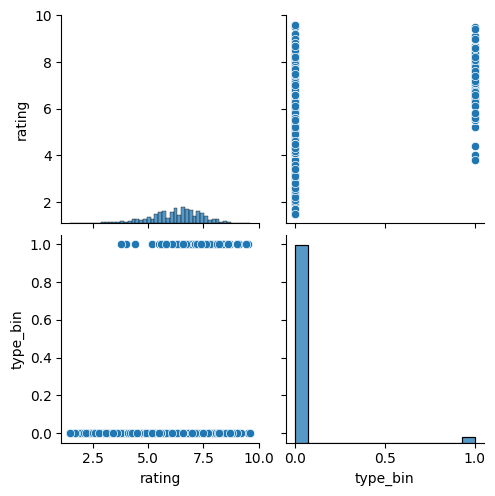

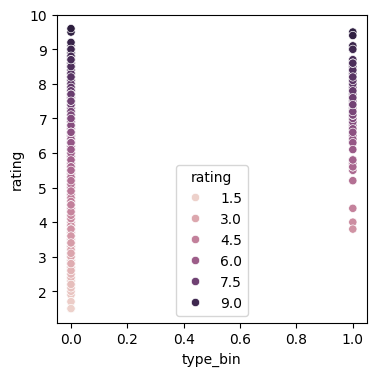

In [249]:
multivarViz(MovieCat, ['rating', 'type_bin', 'aud_cat'], 'rating')

#### As there are no significant correlation, we can excluded the use of [type], [aud_cat] values for this prediction
---

#### 2a.3) Numeric Predictor Special Case: [Duration]

##### Duration has different units for Movies and TV Show. Hence, they are modelled seperately

##### 2.a.3.1) Preparing dataset

In [250]:
MovieDuration = MovieData.copy()                                                                          
MovieDuration.drop(columns=['director', 'cast', 'genres', 'country', 'date_added', 'release_year', 'aud_cat'], inplace=True)     #dropping unused columns
getInfo(MovieDuration)                                                                                                   #checking dtype

<class 'pandas.core.frame.DataFrame'>
Index: 4955 entries, s8 to s8807
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   type      4955 non-null   object 
 1   rating    4955 non-null   float64
 2   duration  4955 non-null   object 
dtypes: float64(1), object(2)
memory usage: 283.9+ KB
None 
-------------------------------------------------------- 
type:		 <class 'pandas.core.frame.DataFrame'> 
size RxC:	 (4955, 3) 
cols dtypes:
 type         object
rating      float64
duration     object
dtype: object 
--------
Stats
--------
             rating
count  4955.000000
mean      6.260202
std       1.171019
min       1.500000
25%       5.600000
50%       6.400000
75%       7.100000
max       9.600000 
########END########


type  rating   duration
show_id                            
s8         Movie     7.0    125 min
s9       TV Show     8.6  9 Seasons
s10        Movie     6.4    104 min
s13        Movie     5.5    127 min
s28        Movie     6.0    103 min
...          ...     ...        ...
s8800      Movie     7.0    120 min
s8802      Movie     6.6     96 min
s8803      Movie     7.7    158 min
s8805      Movie     7.5     88 min
s8807      Movie     6.1    111 min

[4955 rows x 3 columns]

-> Additional Data Manipulation

Seperating data to seperate dataframes of movie and TV shows because of different units in duration

In [251]:
MovieDurationDict = Movie_TVSplitter(MovieDuration)
MovieDurationDict['TV Show']

rating   duration
show_id                   
s9          8.6  9 Seasons
s199        6.8   1 Season
s274        6.3   1 Season
s277        6.6  2 Seasons
s298        5.8   1 Season
...         ...        ...
s8173       5.6   1 Season
s8215       9.0   1 Season
s8294       3.8   1 Season
s8303       5.8   1 Season
s8600       8.2  3 Seasons

[134 rows x 2 columns]

-> dtype Manipulation + Formatting

Converting to appropriate dtypes and format

In [252]:
for key in MovieDurationDict: 
    MovieDuration = MovieDurationDict[key]
    MovieDuration['duration'] = MovieDuration['duration'].apply(lambda x: int(x.split()[0]))     #Making single unit for duration

    mapDicts = {                                                            #Changing Column Name Appropriately
        'Movie': {'duration' : 'duration/min'},
        'TV Show': {'duration' : 'Duration/seasons'}
    }
    MovieDuration.rename(columns=mapDicts[key], inplace=True)

MovieDurationDict['TV Show']

rating  Duration/seasons
show_id                          
s9          8.6                 9
s199        6.8                 1
s274        6.3                 1
s277        6.6                 2
s298        5.8                 1
...         ...               ...
s8173       5.6                 1
s8215       9.0                 1
s8294       3.8                 1
s8303       5.8                 1
s8600       8.2                 3

[134 rows x 2 columns]

##### 2.a.3.2) Exploration

-> For Movies


-------
Statistical Description:
-------
             rating  duration/min
count  4821.000000   4821.000000
mean      6.233333    102.892968
std       1.163112     26.020335
min       1.500000      8.000000
25%       5.500000     89.000000
50%       6.400000    101.000000
75%       7.100000    117.000000
max       9.600000    253.000000


rating  duration/min
show_id                      
s8          7.0           125
s10         6.4           104
s13         5.5           127
s28         6.0           103
s29         6.3            97
...         ...           ...
s8800       7.0           120
s8802       6.6            96
s8803       7.7           158
s8805       7.5            88
s8807       6.1           111

[4821 rows x 2 columns]

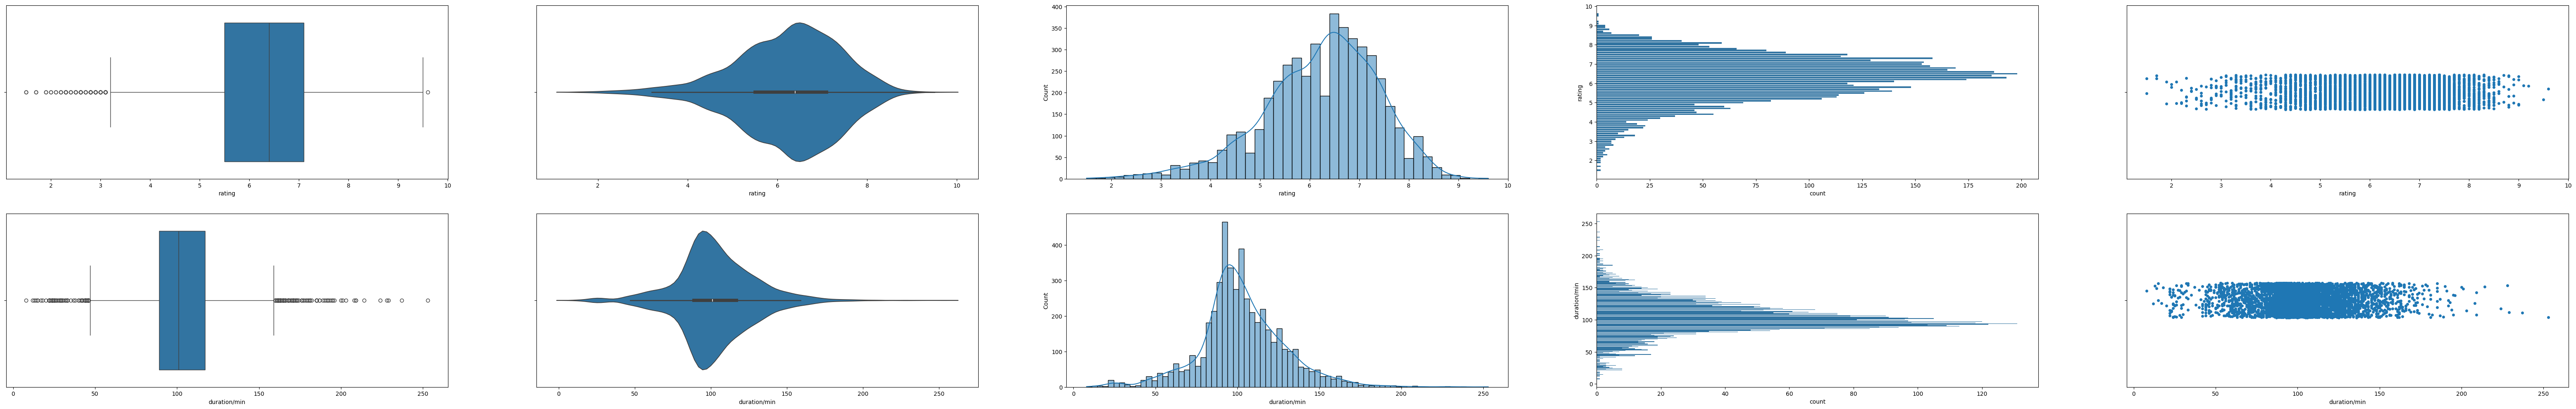

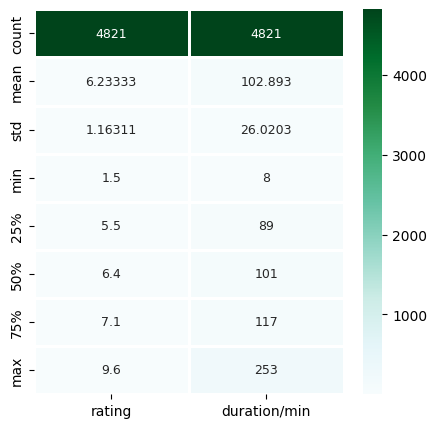

In [253]:
multiUniVarViz(MovieDurationDict['Movie'])


-------
Statistical Description:
-------
             rating  duration/min
count  4821.000000   4821.000000
mean      6.233333    102.892968
std       1.163112     26.020335
min       1.500000      8.000000
25%       5.500000     89.000000
50%       6.400000    101.000000
75%       7.100000    117.000000
max       9.600000    253.000000


rating  duration/min
show_id                      
s8          7.0           125
s10         6.4           104
s13         5.5           127
s28         6.0           103
s29         6.3            97
...         ...           ...
s8800       7.0           120
s8802       6.6            96
s8803       7.7           158
s8805       7.5            88
s8807       6.1           111

[4821 rows x 2 columns]

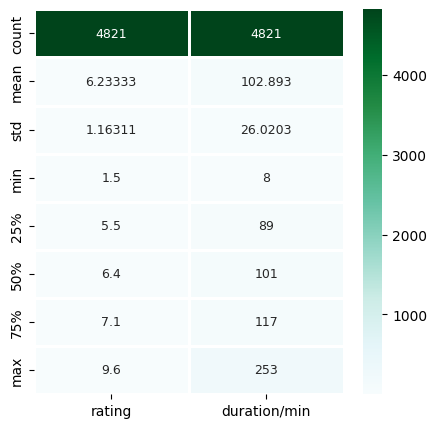

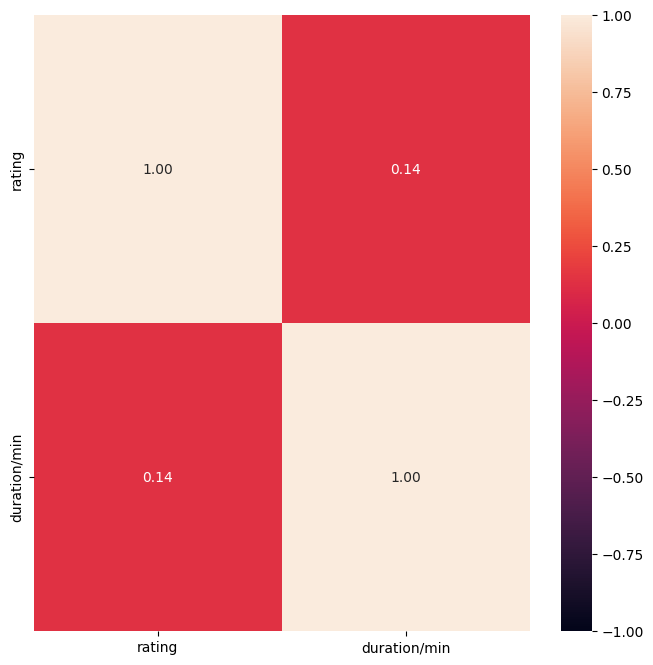

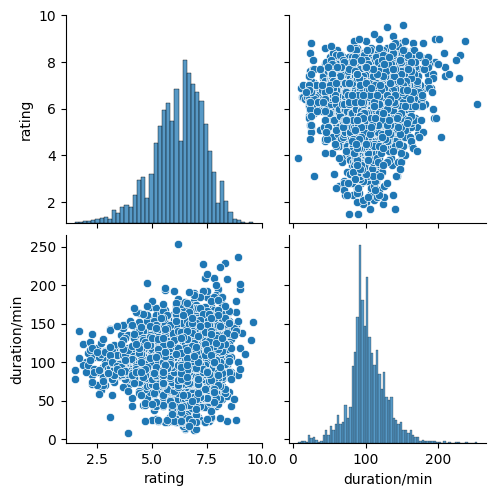

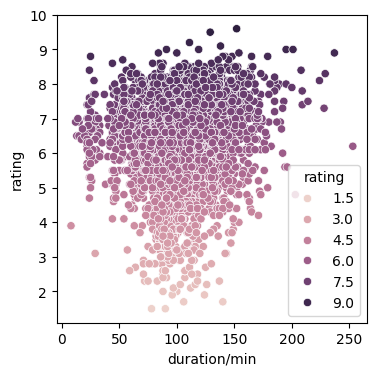

In [254]:
multivarViz(MovieDurationDict['Movie'], responseVar='rating')

-> For TV Shows


-------
Statistical Description:
-------
            rating  Duration/seasons
count  134.000000        134.000000
mean     7.226866          1.925373
std      1.040616          2.143803
min      3.800000          1.000000
25%      6.600000          1.000000
50%      7.200000          1.000000
75%      7.900000          2.000000
max      9.500000         15.000000


rating  Duration/seasons
show_id                          
s9          8.6                 9
s199        6.8                 1
s274        6.3                 1
s277        6.6                 2
s298        5.8                 1
...         ...               ...
s8173       5.6                 1
s8215       9.0                 1
s8294       3.8                 1
s8303       5.8                 1
s8600       8.2                 3

[134 rows x 2 columns]

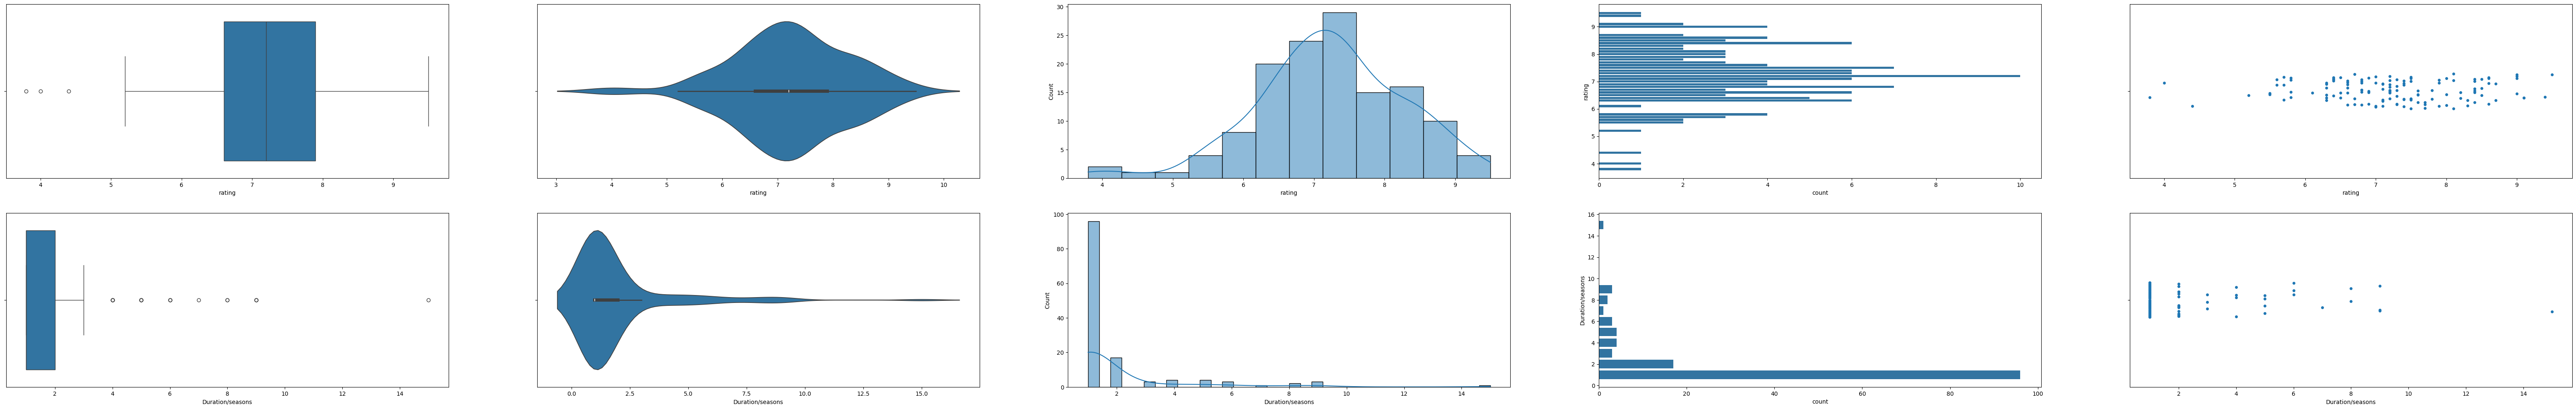

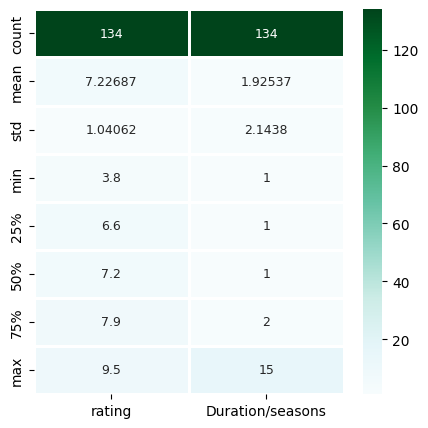

In [255]:
multiUniVarViz(MovieDurationDict['TV Show'])


-------
Statistical Description:
-------
            rating  Duration/seasons
count  134.000000        134.000000
mean     7.226866          1.925373
std      1.040616          2.143803
min      3.800000          1.000000
25%      6.600000          1.000000
50%      7.200000          1.000000
75%      7.900000          2.000000
max      9.500000         15.000000


rating  Duration/seasons
show_id                          
s9          8.6                 9
s199        6.8                 1
s274        6.3                 1
s277        6.6                 2
s298        5.8                 1
...         ...               ...
s8173       5.6                 1
s8215       9.0                 1
s8294       3.8                 1
s8303       5.8                 1
s8600       8.2                 3

[134 rows x 2 columns]

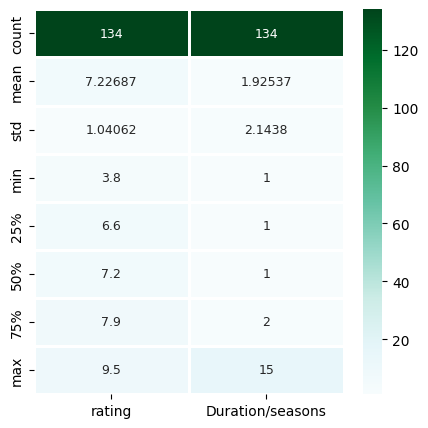

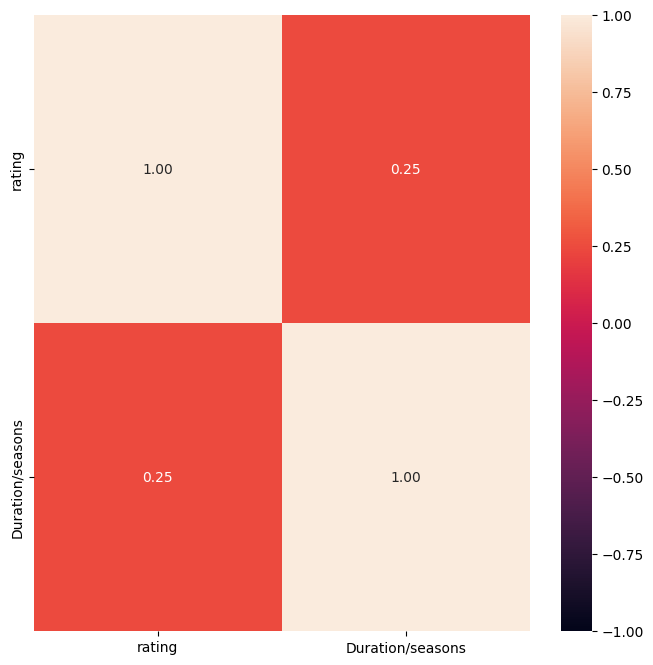

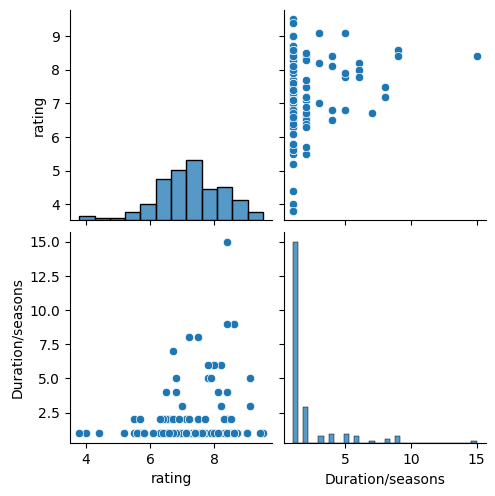

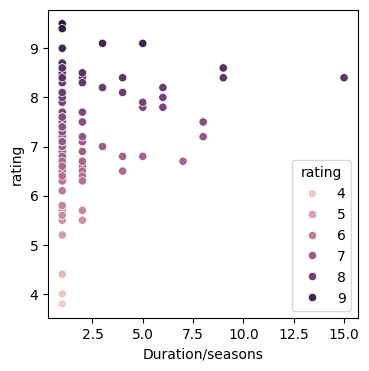

In [256]:
multivarViz(MovieDurationDict['TV Show'], responseVar='rating')

#### As there are no significant correlation, we excluded the use of [duration] values for this prediction
---

### As there are no significant correlation, we can excluded the use of all non-list values for this prediction
---

In [154]:
#Removing the non-predictor columns as we will not need it for the prediction later
MovieData.drop(columns=['duration', 'date_added', 'release_year', 'type'], inplace=True)
MovieData

director  \
show_id                          
s8              [Haile Gerima]   
s9           [Andy Devonshire]   
s10           [Theodore Melfi]   
s13      [Christian Schwochow]   
s28             [Dennis Dugan]   
...                        ...   
s8800         [Avadhoot Gupte]   
s8802        [Majid Al Ansari]   
s8803          [David Fincher]   
s8805        [Ruben Fleischer]   
s8807            [Mozez Singh]   

                                                      cast  \
show_id                                                      
s8       [Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...   
s9       [Mel Giedroyc, Sue Perkins, Mary Berry, Paul H...   
s10      [Melissa McCarthy, Chris O'Dowd, Kevin Kline, ...   
s13      [Luna Wedler, Jannis Niewöhner, Milan Peschel,...   
s28      [Adam Sandler, Kevin James, Chris Rock, David ...   
...                                                    ...   
s8800    [Santosh Juvekar, Siddharth Chandekar, Sachit ...   
s8802    [Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri,...   
s8803    [Mark Ruffalo, Jake Gyllenhaal, Robert Downey ...   
s8805    [Jesse Eisenberg, Woody Harrelson, Emma Stone,...   
s8807    [Vicky Kaushal, Sarah-Jane Dias, Raaghav Chana...   

                                                   country  rating  \
show_id                                                              
s8       [United States, Ghana, Burkina Faso, United Ki...     7.0   
s9                                        [United Kingdom]     8.6   
s10                                        [United States]     6.4   
s13                              [Germany, Czech Republic]     5.5   
s28                                        [United States]     6.0   
...                                                    ...     ...   
s8800                                              [India]     7.0   
s8802                       [United Arab Emirates, Jordan]     6.6   
s8803                                      [United States]     7.7   
s8805                                      [United States]     7.5   
s8807                                              [India]     6.1   

                                                    genres aud_cat  
show_id                                                             
s8       [Dramas, Independent Movies, International Mov...   TV-MA  
s9                          [British TV Shows, Reality TV]   TV-14  
s10                                     [Comedies, Dramas]   PG-13  
s13                         [Dramas, International Movies]   TV-MA  
s28                                             [Comedies]   PG-13  
...                                                    ...     ...  
s8800                       [Dramas, International Movies]   TV-14  
s8802            [Dramas, International Movies, Thrillers]   TV-MA  
s8803                     [Cult Movies, Dramas, Thrillers]       R  
s8805                            [Comedies, Horror Movies]       R  
s8807     [Dramas, International Movies, Music & Musicals]   TV-14  

[4955 rows x 6 columns]

### 2b) Array Value Predictors: [country], [genres], [director], [cast]

#### 2.b.1) Only Consider Top N values for arrays with excessive predictors for resoure limitations

#### Functions to use

In [155]:
def seetopN(series,i=0):                                    #Function to show the ammount N of values in the list predictors  
    max=0
    imax = 0
    if(isinstance(series[0],str)): return len(series)   #Returns length of list if list is passed
    for i, list in enumerate(series):
        lenlist = len(list)
        if(lenlist > max): 
            max = lenlist
            imax = i
    if(i): return imax, max
    return max                                    #Return[0]: position of max value Return[1]: Max Value

#### Examining Univariate Statistical Distribution of number of uniqe entries


-------
Statistical Description:
-------
            NofCast       NofDir     NofGenre   NofCountry
count  4955.000000  4955.000000  4955.000000  4955.000000
mean      8.038547     1.118870     2.221393     1.295459
std       3.880056     0.563129     0.767493     0.730202
min       1.000000     1.000000     1.000000     1.000000
25%       6.000000     1.000000     2.000000     1.000000
50%       8.000000     1.000000     2.000000     1.000000
75%      10.000000     1.000000     3.000000     1.000000
max      44.000000    13.000000     3.000000     8.000000


NofCast  NofDir  NofGenre  NofCountry
show_id                                       
s8             8       1         3           6
s9             4       1         2           1
s10           11       1         2           1
s13           11       1         2           2
s28           11       1         1           1
...          ...     ...       ...         ...
s8800          8       1         2           1
s8802          6       1         3           2
s8803         10       1         3           1
s8805          7       1         2           1
s8807          8       1         3           1

[4955 rows x 4 columns]

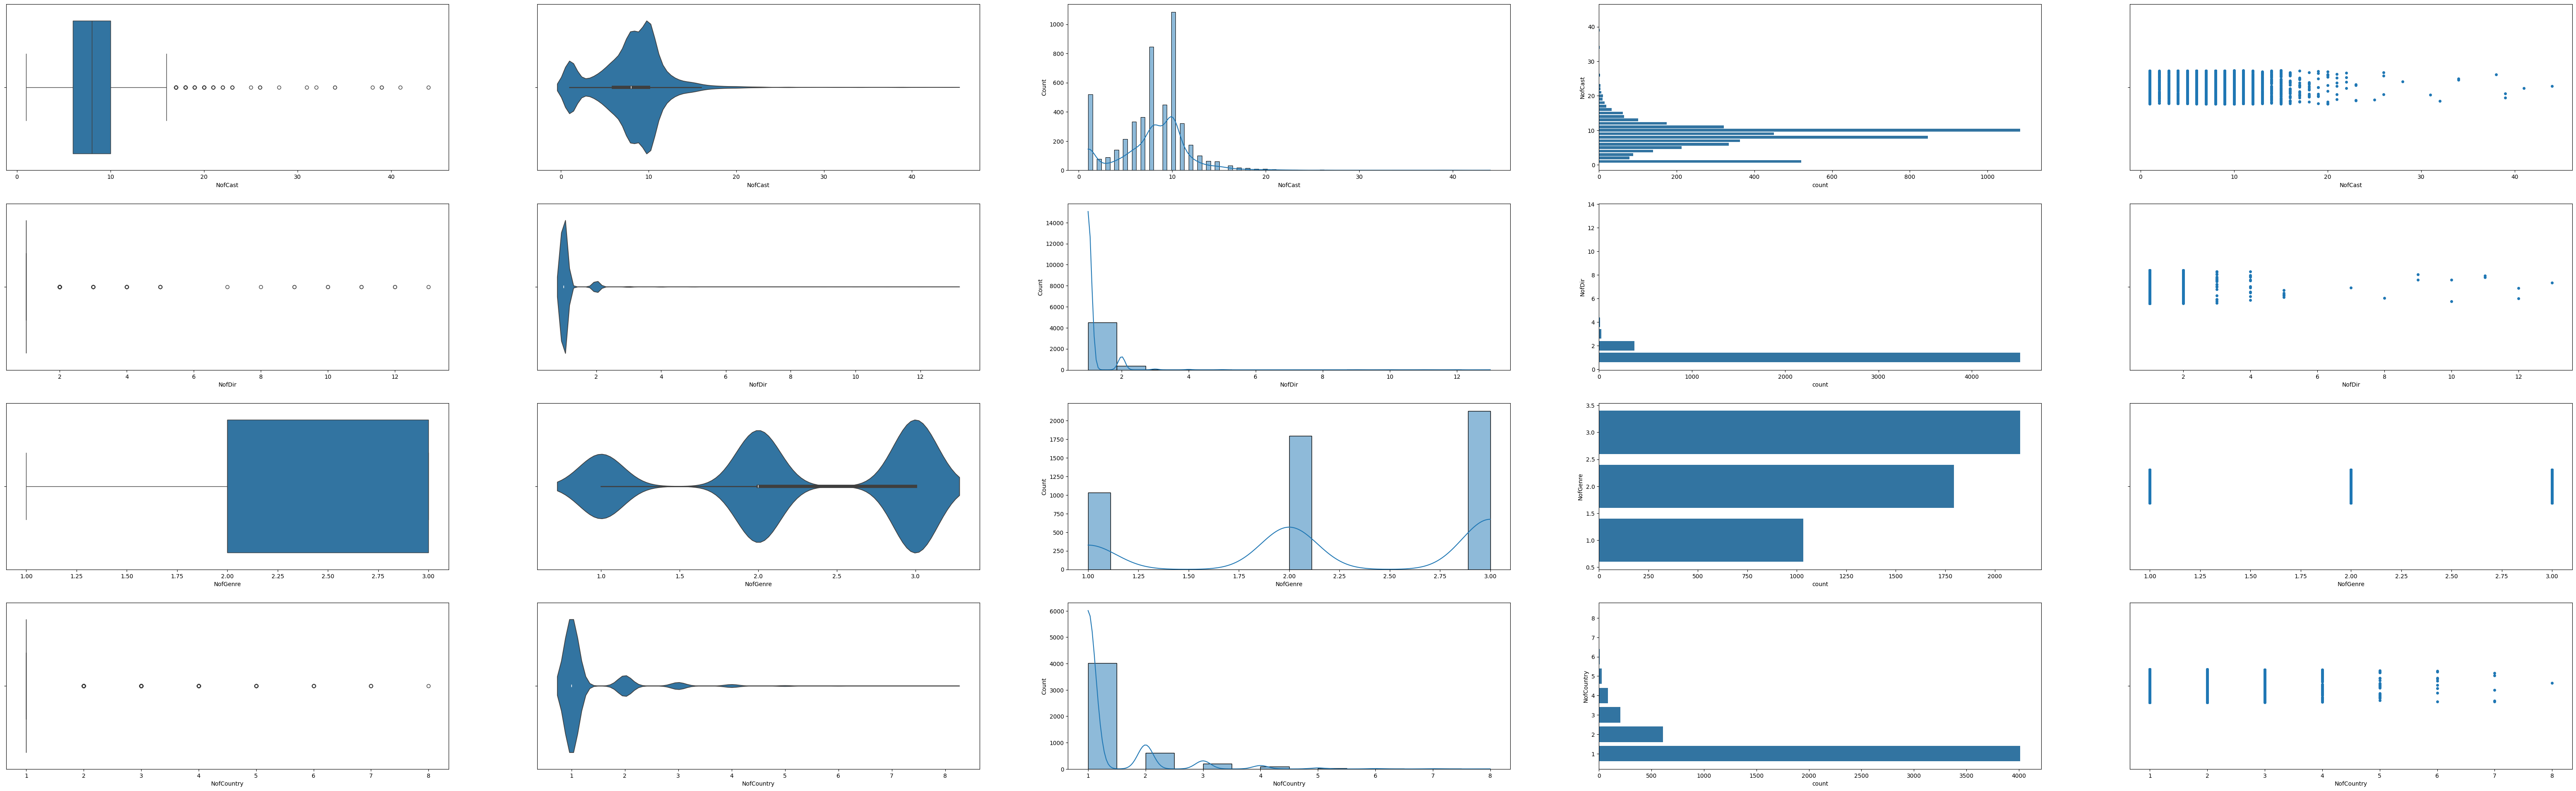

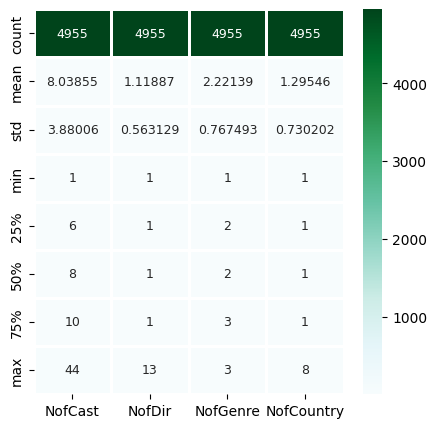

In [156]:
MovieNofX = pd.DataFrame()

MovieNofX['NofCast'] = MovieData['cast'].apply(lambda x: seetopN(x))
MovieNofX['NofDir'] = MovieData['director'].apply(lambda x: seetopN(x))
MovieNofX['NofGenre'] = MovieData['genres'].apply(lambda x: seetopN(x))
MovieNofX['NofCountry'] = MovieData['country'].apply(lambda x: seetopN(x))

multiUniVarViz(MovieNofX)

Cast is excessive at an average of ~8

#### Only Consider Top 5 for [cast] for more accuracy and resource efficiency
---

In [157]:
MovieData['cast'] = MovieData['cast'].apply(lambda x: x[:5])     #Considering only top 5 cast
print(seetopN(MovieData['cast'],i=1))
MovieData

(0, 5)


director  \
show_id                          
s8              [Haile Gerima]   
s9           [Andy Devonshire]   
s10           [Theodore Melfi]   
s13      [Christian Schwochow]   
s28             [Dennis Dugan]   
...                        ...   
s8800         [Avadhoot Gupte]   
s8802        [Majid Al Ansari]   
s8803          [David Fincher]   
s8805        [Ruben Fleischer]   
s8807            [Mozez Singh]   

                                                      cast  \
show_id                                                      
s8       [Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...   
s9       [Mel Giedroyc, Sue Perkins, Mary Berry, Paul H...   
s10      [Melissa McCarthy, Chris O'Dowd, Kevin Kline, ...   
s13      [Luna Wedler, Jannis Niewöhner, Milan Peschel,...   
s28      [Adam Sandler, Kevin James, Chris Rock, David ...   
...                                                    ...   
s8800    [Santosh Juvekar, Siddharth Chandekar, Sachit ...   
s8802    [Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri,...   
s8803    [Mark Ruffalo, Jake Gyllenhaal, Robert Downey ...   
s8805    [Jesse Eisenberg, Woody Harrelson, Emma Stone,...   
s8807    [Vicky Kaushal, Sarah-Jane Dias, Raaghav Chana...   

                                                   country  rating  \
show_id                                                              
s8       [United States, Ghana, Burkina Faso, United Ki...     7.0   
s9                                        [United Kingdom]     8.6   
s10                                        [United States]     6.4   
s13                              [Germany, Czech Republic]     5.5   
s28                                        [United States]     6.0   
...                                                    ...     ...   
s8800                                              [India]     7.0   
s8802                       [United Arab Emirates, Jordan]     6.6   
s8803                                      [United States]     7.7   
s8805                                      [United States]     7.5   
s8807                                              [India]     6.1   

                                                    genres aud_cat  
show_id                                                             
s8       [Dramas, Independent Movies, International Mov...   TV-MA  
s9                          [British TV Shows, Reality TV]   TV-14  
s10                                     [Comedies, Dramas]   PG-13  
s13                         [Dramas, International Movies]   TV-MA  
s28                                             [Comedies]   PG-13  
...                                                    ...     ...  
s8800                       [Dramas, International Movies]   TV-14  
s8802            [Dramas, International Movies, Thrillers]   TV-MA  
s8803                     [Cult Movies, Dramas, Thrillers]       R  
s8805                            [Comedies, Horror Movies]       R  
s8807     [Dramas, International Movies, Music & Musicals]   TV-14  

[4955 rows x 6 columns]

#### 2b.2) Multivariate Exploration By Seperating Top (15) appearing Values for Each Predictor

##### Approach -> Get an array of Dataframes series of response ['rating'] filtered based on whether the predictor is present

##### Functions to Use

In [158]:
def topList(series, topN, truncate=0):                          #Gets List of top N appearing predictors    #truncate determines the inclusion(1) or exclusion(0) of truncated values  
    if(isinstance(series.iloc[0],list)):                        #Check if series values are lists or standard strings
        uniqelist = []                                          #Getting a Series of all values (repeated) entries for predictors from if they are list values
        for i in series:
            uniqelist.extend(i)
        uniqeSeries = pd.Series(uniqelist)                            
    else: uniqeSeries = series                                  #Directly use values if predictors are already string values

    toplist = uniqeSeries.value_counts(ascending=False)         #Checking the most popular genres in column in ascending order
    truncated = toplist[topN:]                                  #Truncate remaining values
    toplist = toplist[:topN]                                    #Displaying only the top N ones in frequency
    if(truncate): toplist.loc['other'] = truncated.sum()        #Adding row of others if truncate

    return toplist, toplist.index.to_list()                     #Return[0]: Series of top N appearing predictors in relation to frequncy of appearance
                                                                #Return[1]: List of top N appearing predictors in descending order

def FilterDFByArrPredictorX(df, predictorX, responseY, topN, other=0):                                                  #Gets a dictionary of dataframe values filtered by predictor being present  #other determines the inclusion(1) or exclusion(0) of truncated values  
    topPreds = topList(df[predictorX] , topN, 0)[1]                                                                     #Call topList() for list of top N appearing predictors
    predictorFilteredDF = df[[predictorX, responseY]]                                                                   #Filtered DF to only predictor and response columns

    reponseDFs = {}                                                                                                     #A dictionary which contains key value pair {<predictorA>:<Filtered DF (of predictor and response) whose predictor column contains predictorA>}
    for response in topPreds:
        reponseDFs[response] = predictorFilteredDF[predictorFilteredDF[predictorX].apply(lambda x: response in x)]
    
    if(other): 
        def otherFilter(rowValue):                                                                                      #filter for arrays which do not contain top N values
            topNPresent = False
            for predictor in rowValue: 
                if(predictor in topPreds): 
                    topNPresent=True
                    break
            return not topNPresent
        reponseDFs['other'] = predictorFilteredDF[predictorFilteredDF[predictorX].apply(lambda x: otherFilter(x))]

    return reponseDFs

def topArrPredictors(df, predictorX, topN, Title, other=0):         #Plots the top N appearing predictors
    toplist = topList(df[predictorX], topN, other)[0]               #Call topList() for list of top N appearing predictors 

    plt.subplots(figsize=(12,10))                                   #Plot
    plt.title(Title)
    
    if(other):
        othervalue = toplist['other']
        otherprop = othervalue/toplist.sum()
        if(otherprop) > 0.5: 
            toplist.drop(labels=['other'], inplace=True)
            toplist['other'] = toplist.mean()
    plot = toplist.plot.barh(width=0.9)                                                                    #Plot Graph
    for i, (index, value) in enumerate(zip(toplist.index.to_list(), toplist.values)):                      #Labels
        value = int(value)
        if(index == 'other'): value = str(othervalue) + ' | ' + str(round(otherprop*100,2)) + '%'
        plot.text(.8, i, value, fontsize=12,color='white',weight='bold')
    plt.show()

    return None
import math

def ArrPredictorsViz(df, predictorX, responseY, topN, other=0, quick=0):                                #Visualizer Function to visualize univariate statistics of response according to whether they contain the top N predictors  #quick replaces swarmplot for stripplot for faster execution
    groupedDFByTopList = FilterDFByArrPredictorX(df, predictorX, responseY, topN, other)                #Call GroupDFByTopList() for Dict of dataframes filtered by predictor being present
    f, axes = plt.subplots(topN+other, 3, figsize = (48,6*topN+other))                                  #Plot
    axesstatrows = math.ceil((topN+other)/8)
    fstat, axesstat = plt.subplots(axesstatrows, 8, figsize = (48,8*axesstatrows))

    for i, predictorX in enumerate(groupedDFByTopList):                      
        dataHandled = groupedDFByTopList[predictorX]                                                    #Iterating through the dataframes
        axesstatHandled = axesstat[int(i/8), i%8]

        title = str(i+1) + ') ' + predictorX + ' | Count: ' + str(len(dataHandled.index))               #Title
        if(predictorX=='other'): title = title.split(') ')[1]
        axes[i,1].set_title(title)                                                                      
        axesstatHandled.set_title(title)                                                        

        sb.boxplot(data = dataHandled, x=responseY, orient = "h", ax = axes[i,0])                
        if(quick): sb.stripplot(data = dataHandled, x='rating', orient = "h", ax = axes[i,1])
        else: sb.swarmplot(data = dataHandled, x='rating', orient = "h", ax = axes[i,1])
        sb.histplot(data = dataHandled, x=responseY, kde=True, ax = axes[i,2])

        sb.heatmap(dataHandled[['rating']].describe(), linewidths = 1, annot = True, annot_kws = {'size': 18}, cmap = 'BuGn', fmt='g', ax=axesstatHandled)
    return None

#### 2b.2.1) Genre

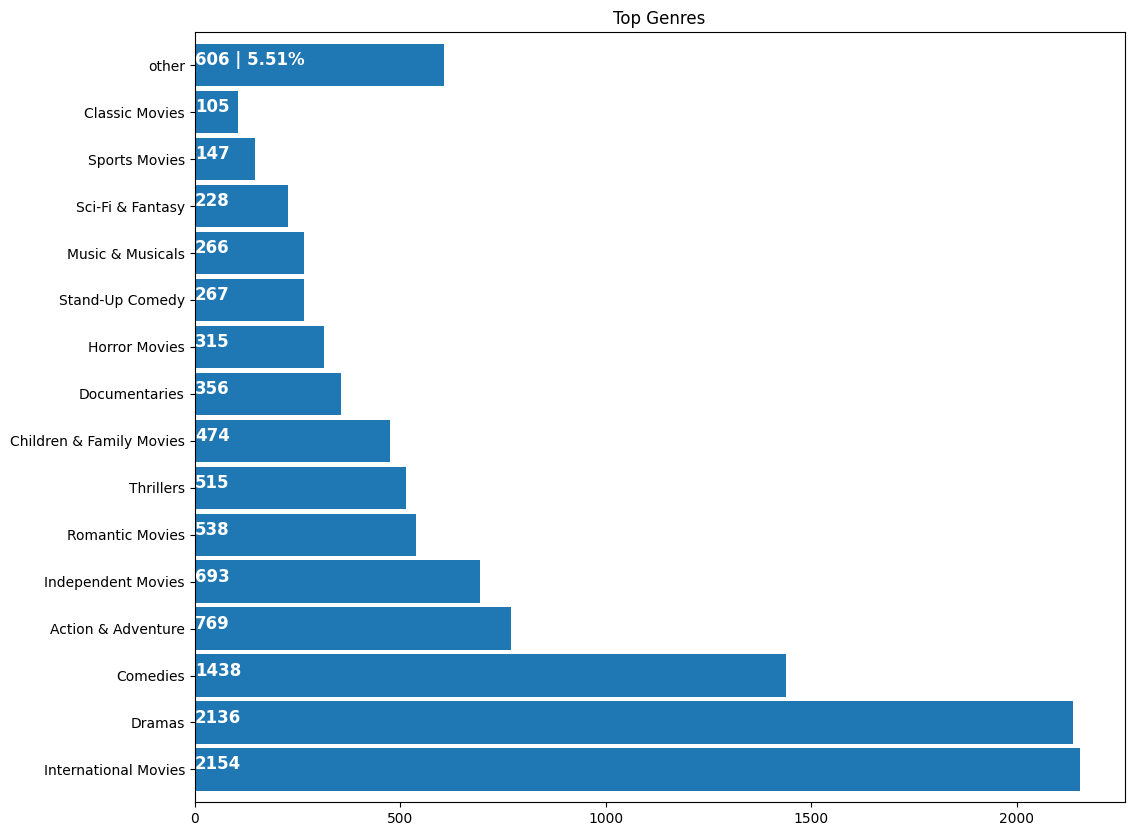

In [159]:
topArrPredictors(MovieData, 'genres', 15, 'Top Genres', 1)

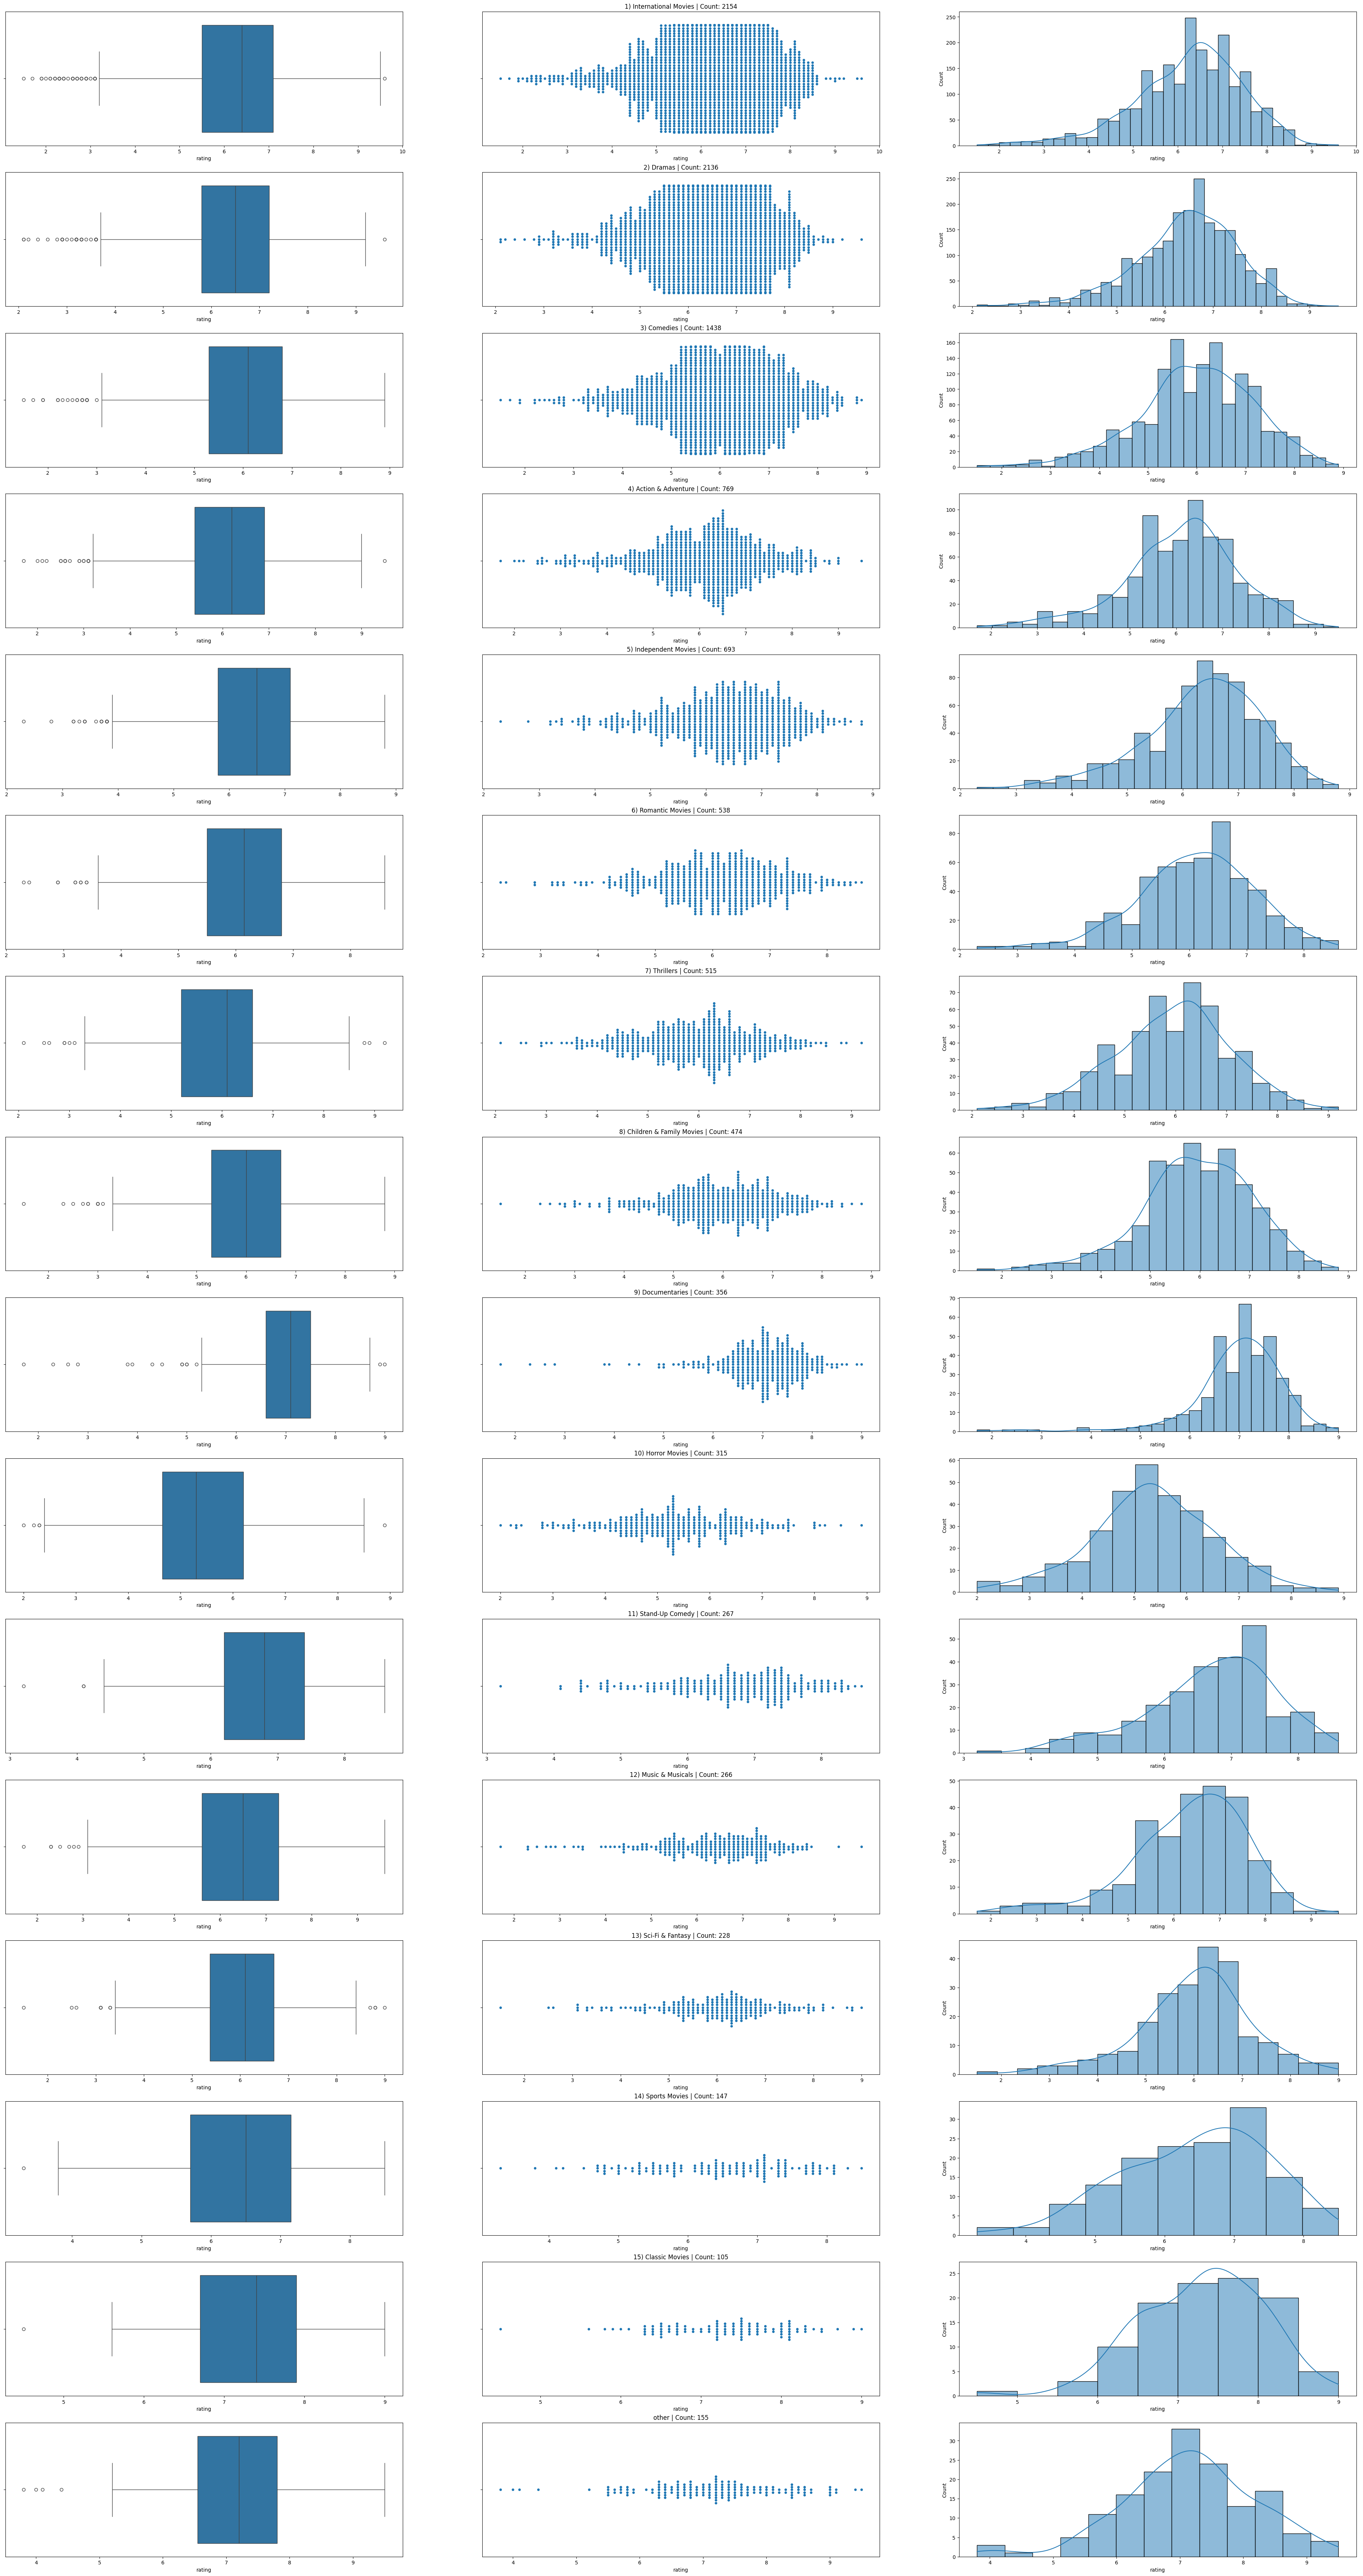

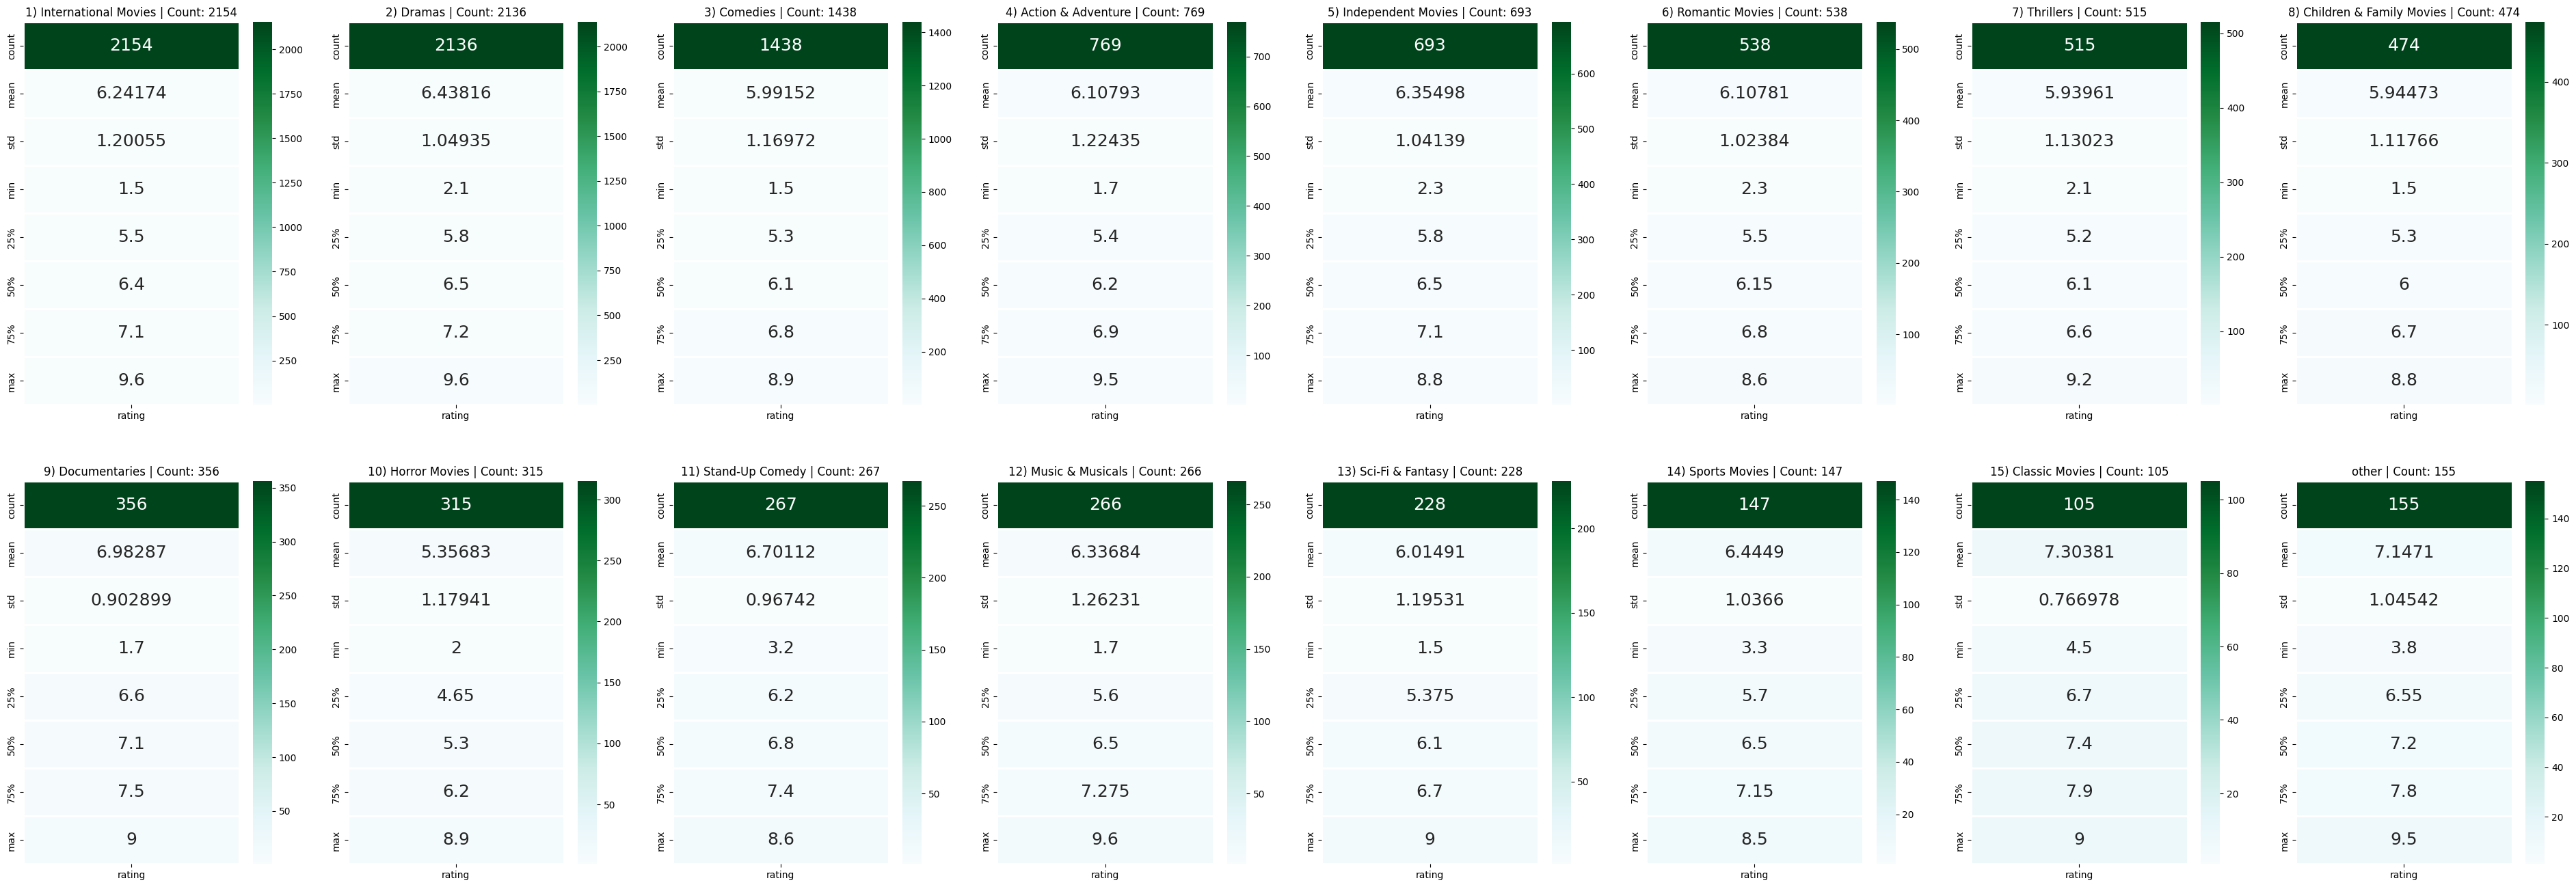

In [160]:
ArrPredictorsViz(MovieData, 'genres', 'rating', 15, 1, 0)

#### We can see that there is quite a lot of variation between distributions of response [rating] with different [genres], signifying that relation of the response variable and the (categorical) predictor variable. Hence we will use [genres] as a predictor
---

#### 2b.2.2) Cast

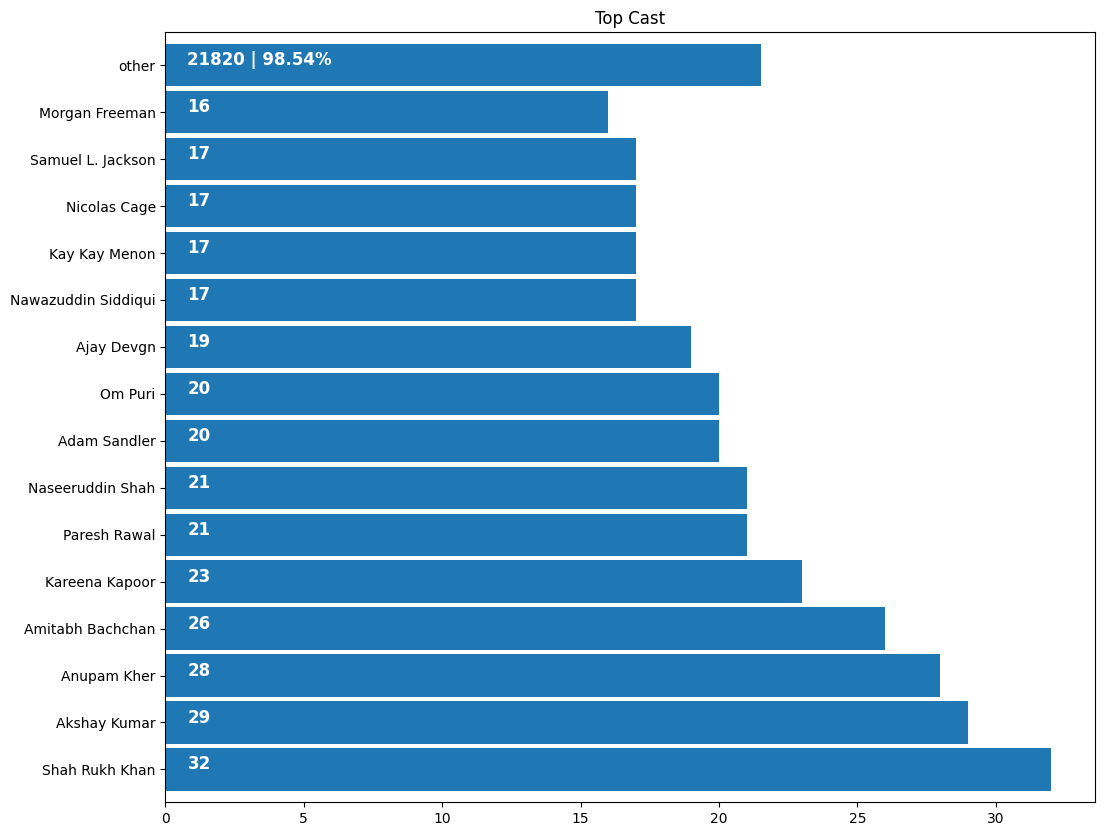

In [161]:
topArrPredictors(MovieData, 'cast', 15, 'Top Cast', 1)

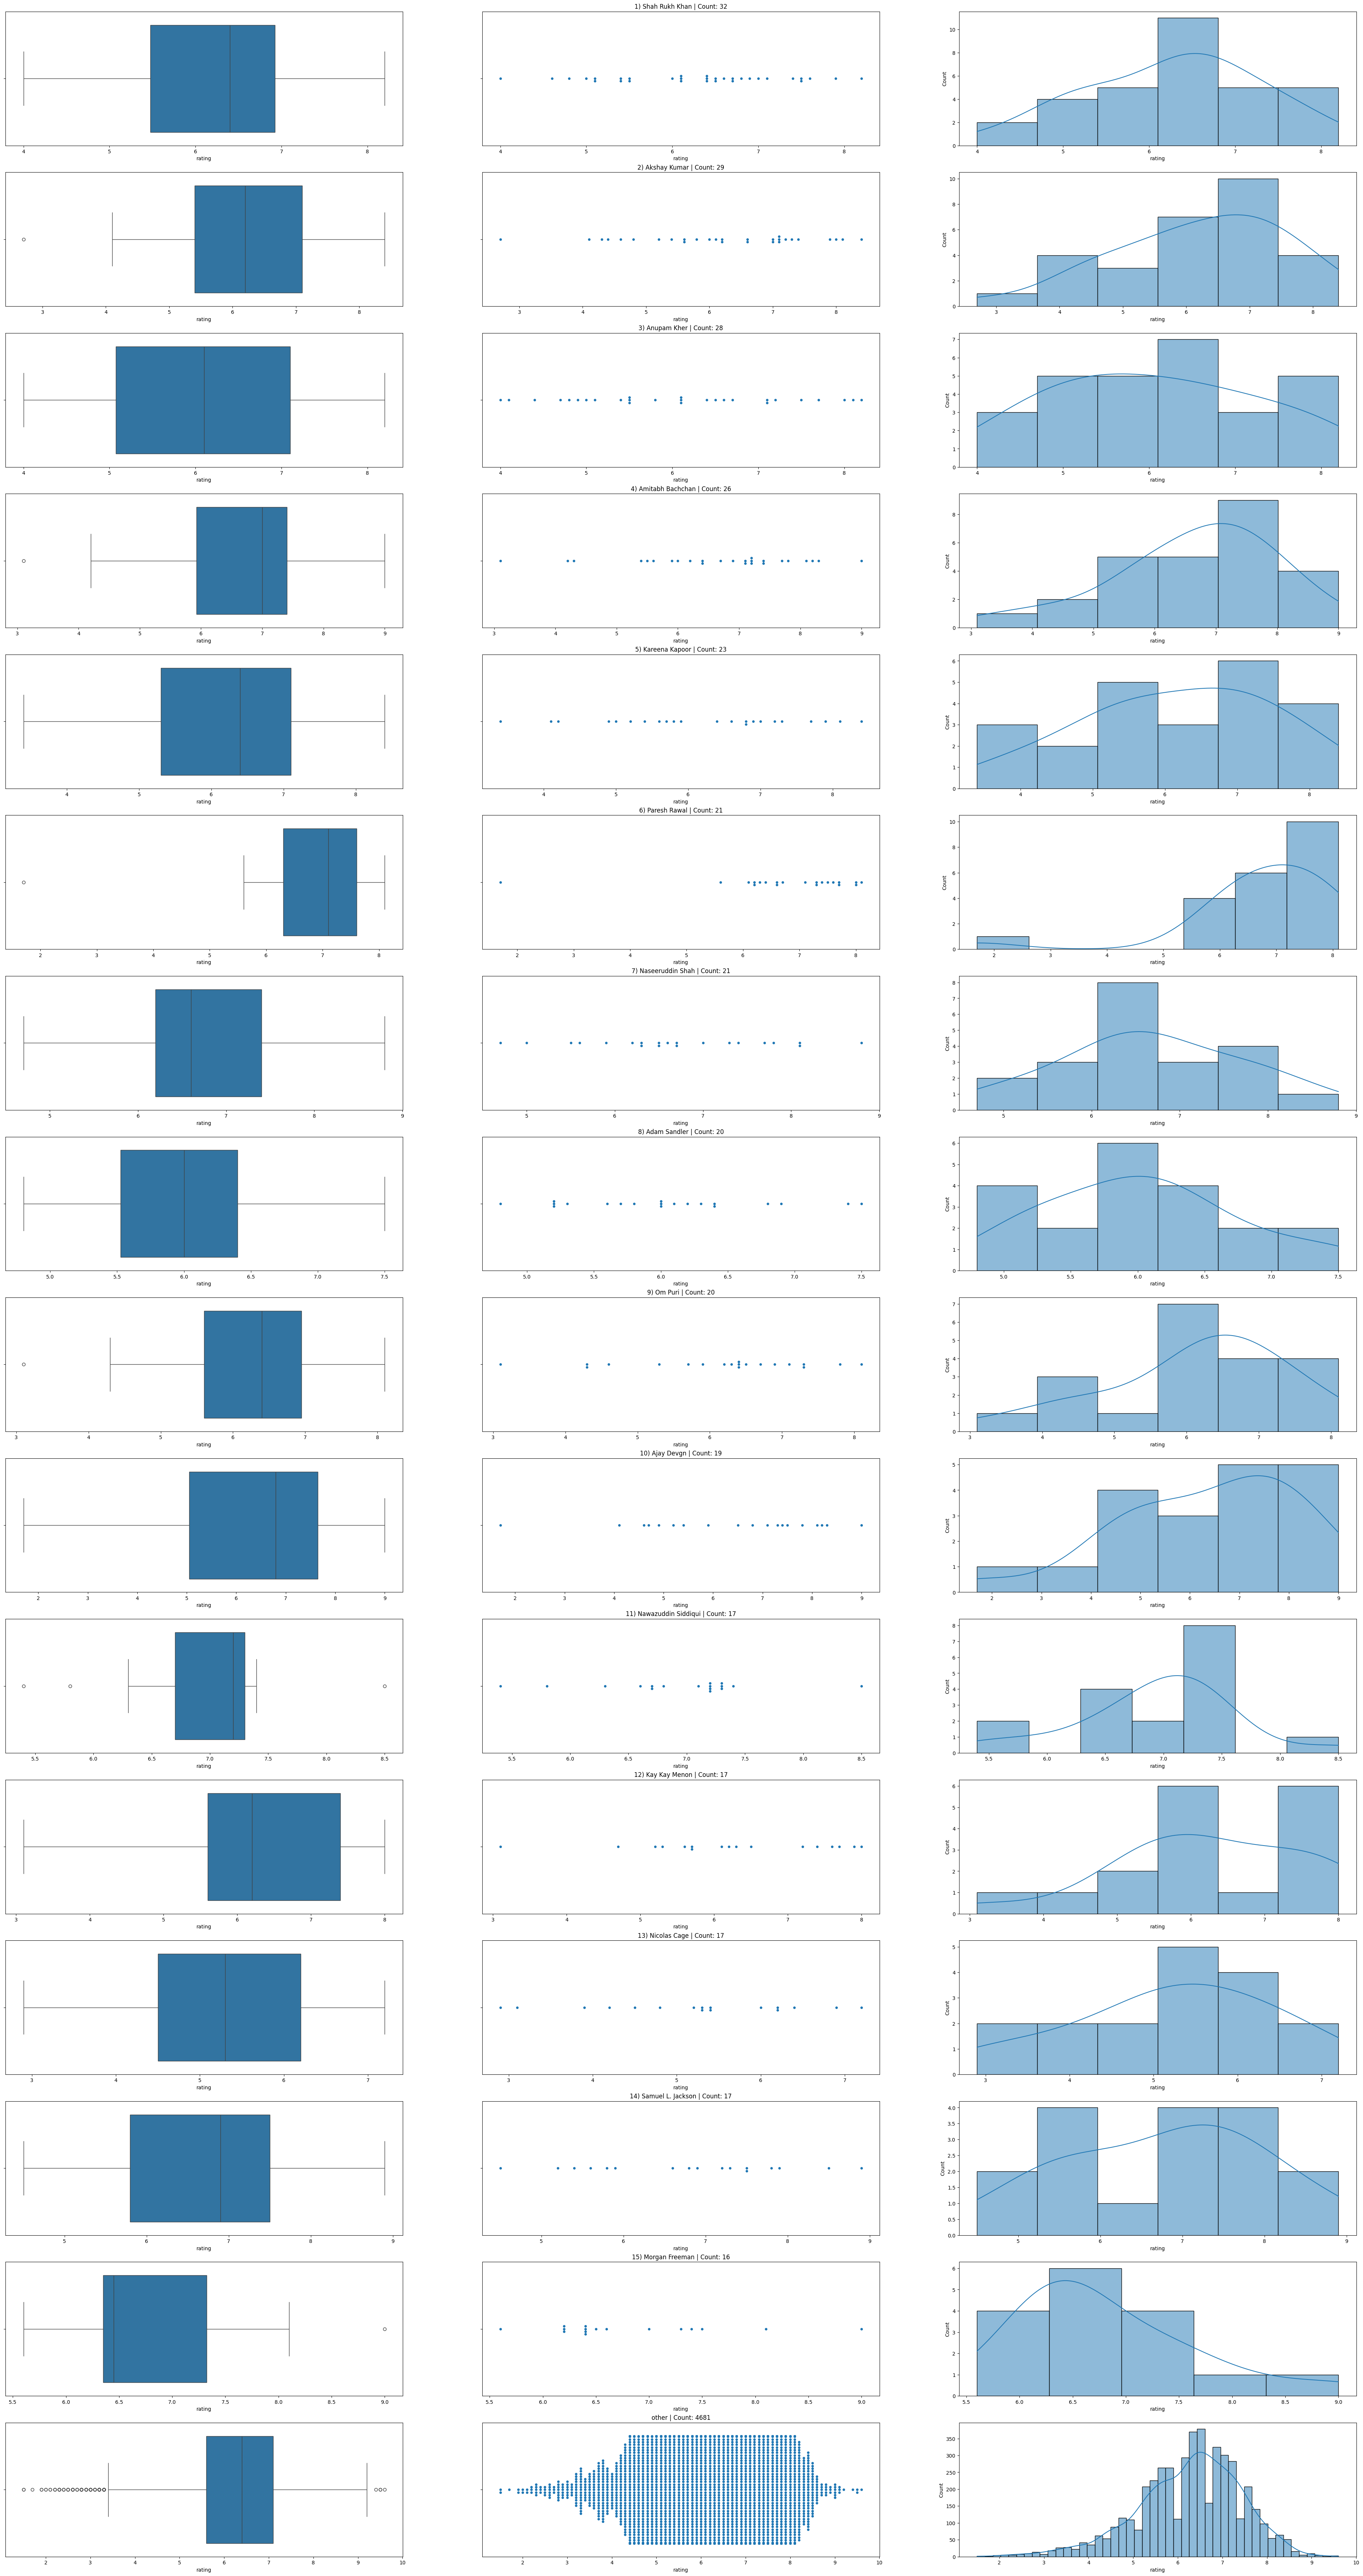

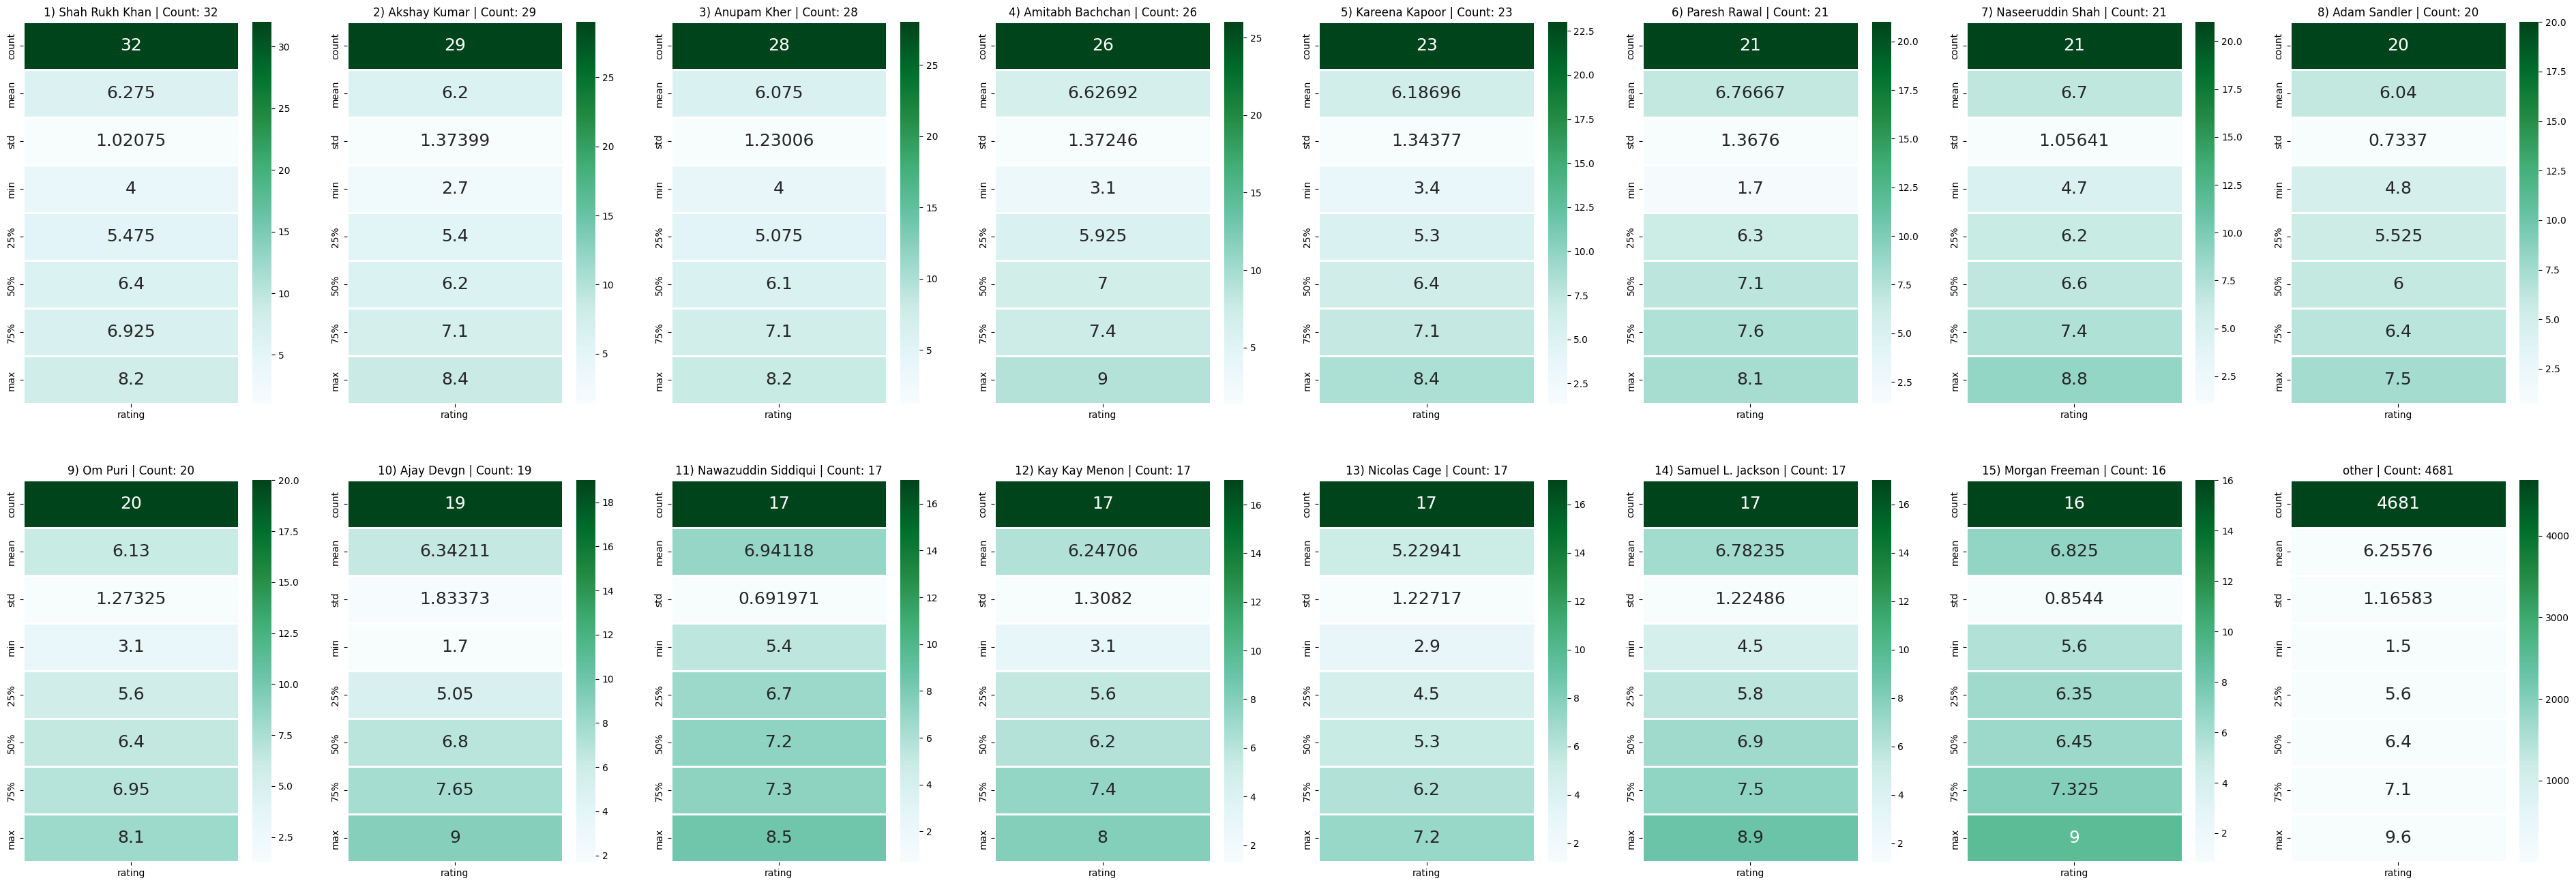

In [162]:
ArrPredictorsViz(MovieData, 'cast', 'rating', 15, 1, 0)

#### We can see that there is quite a lot of variation between distributions of response [rating] with different [cast], signifying that relation of the response variable and the (categorical) predictor variable. Hence we will use [cast] as a predictor
---

#### 2b.2.3) Director

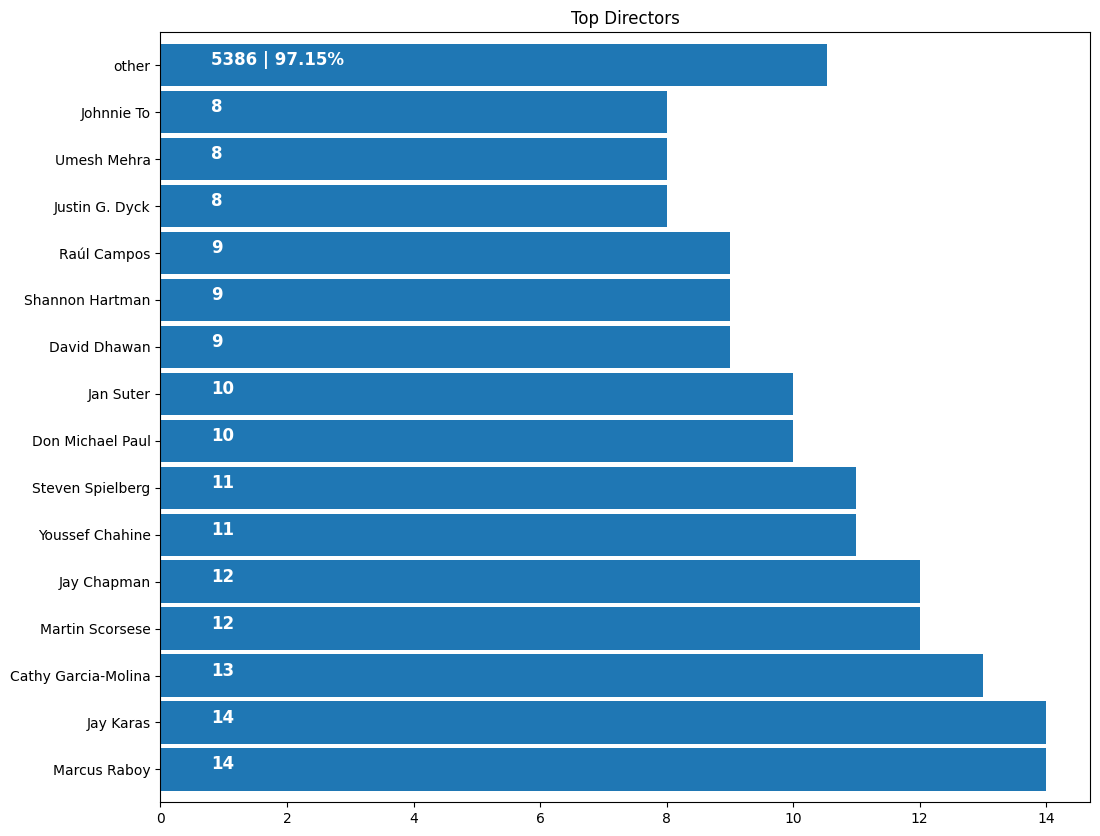

In [163]:
topArrPredictors(MovieData, 'director', 15, 'Top Directors', 1)

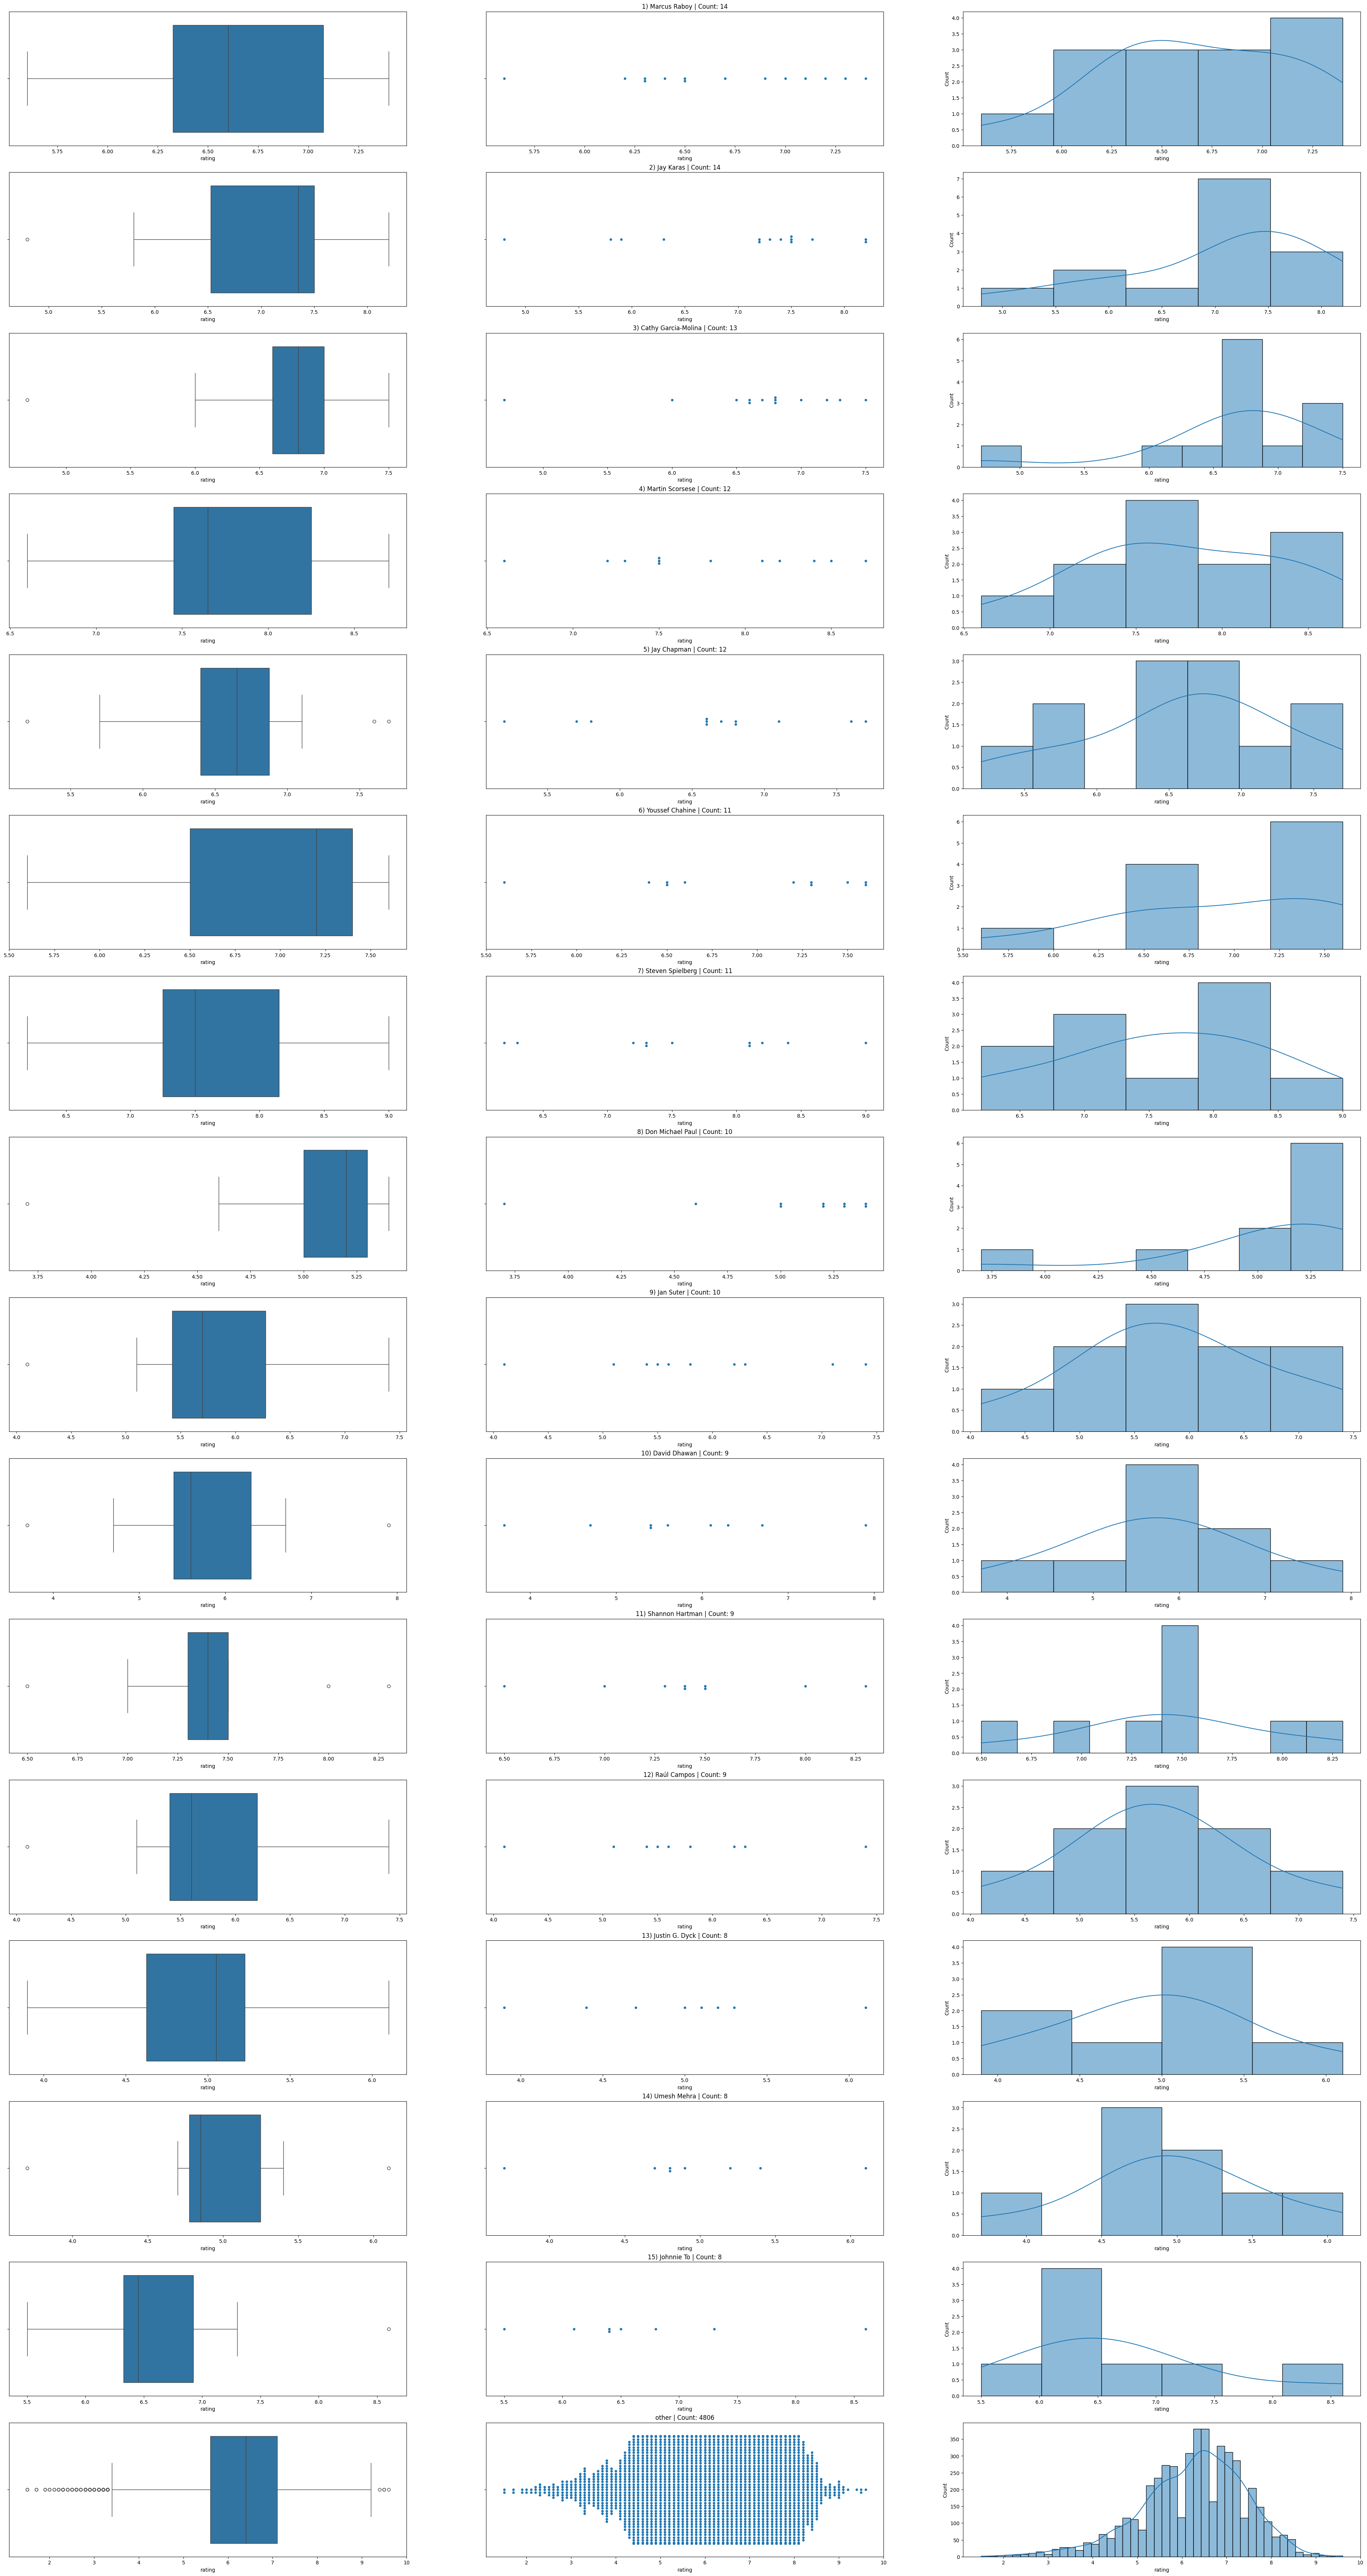

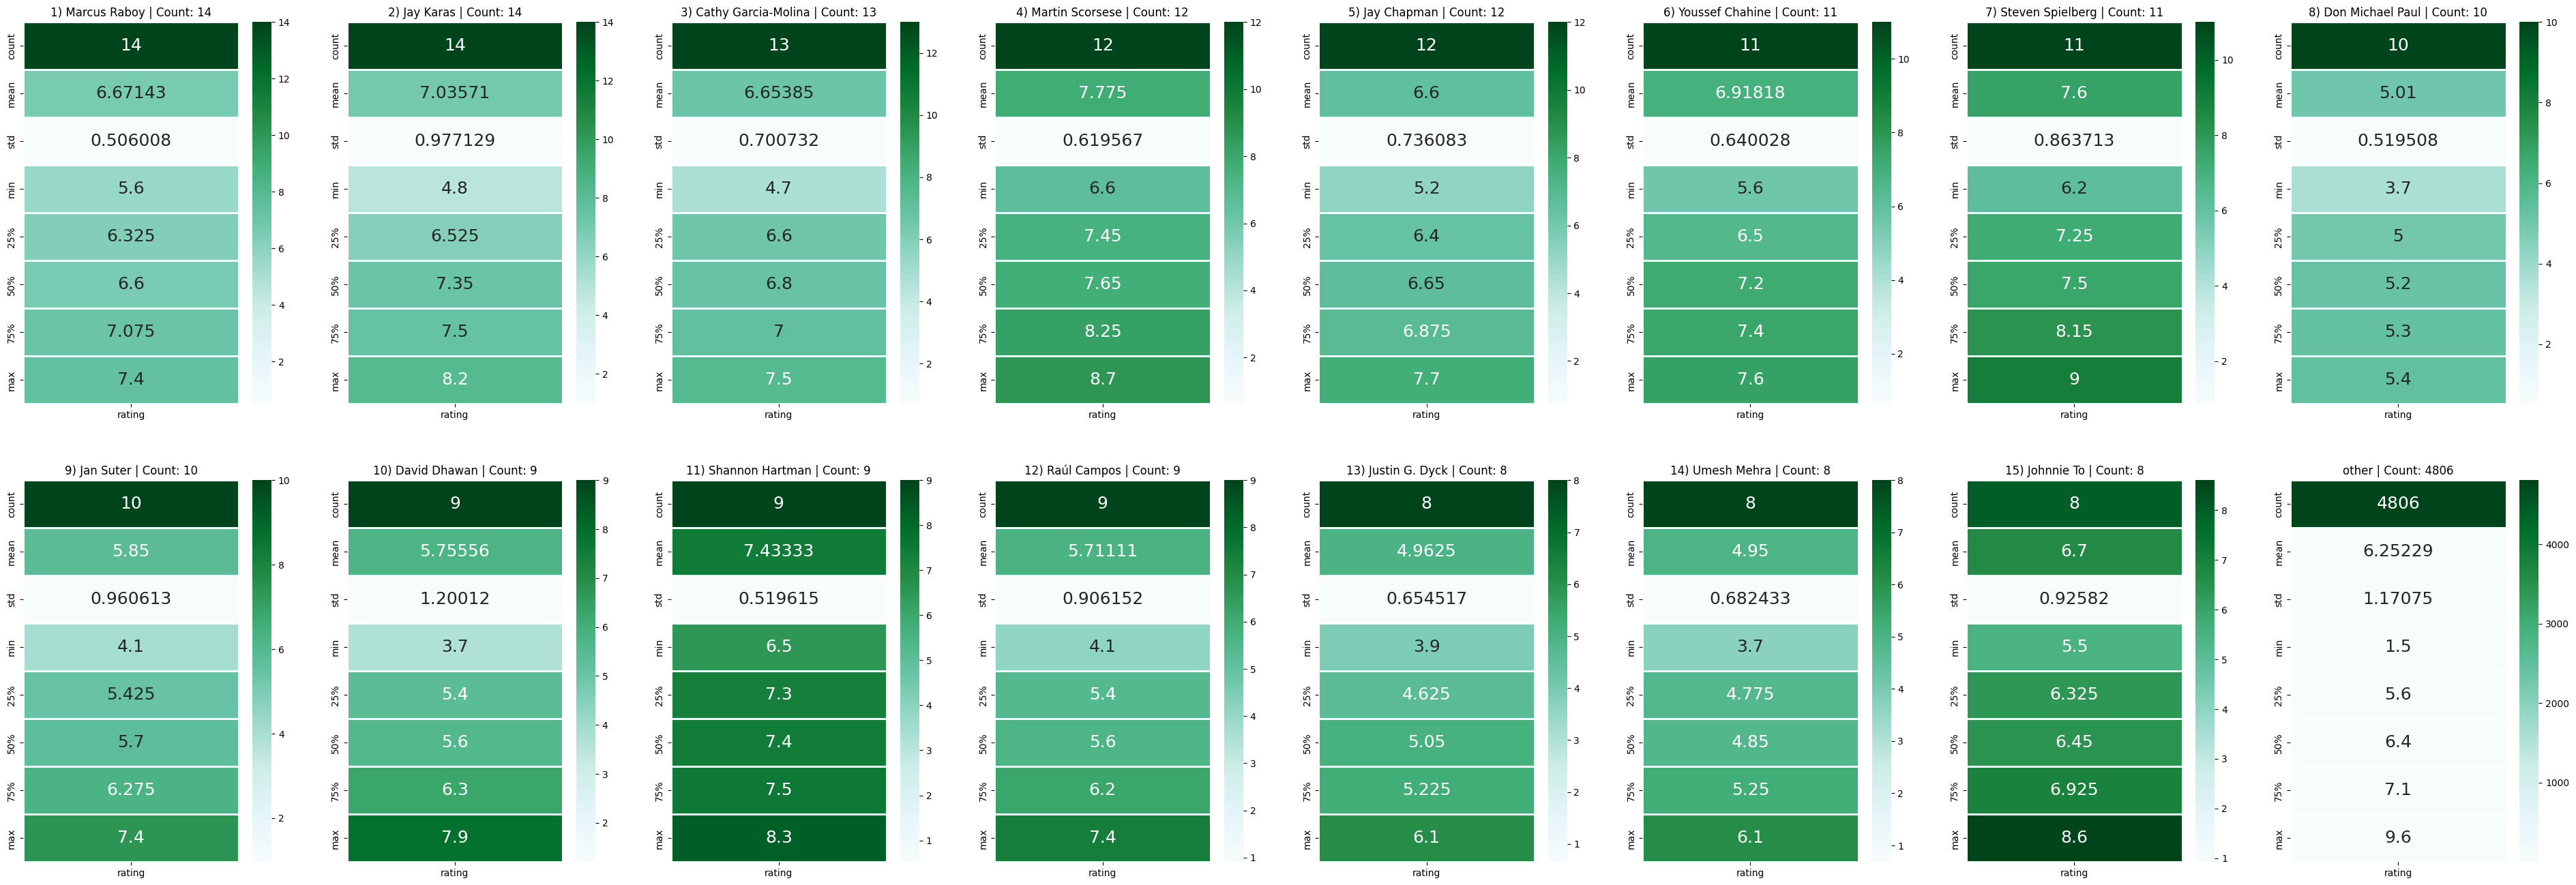

In [164]:
ArrPredictorsViz(MovieData, 'director', 'rating', 15, 1, 0)

#### We can see that there is quite a lot of variation between distributions of response [rating] with different [director], signifying that relation of the response variable and the (categorical) predictor variable. Hence we will use [director] as a predictor
---

#### 2b.2.4) Country

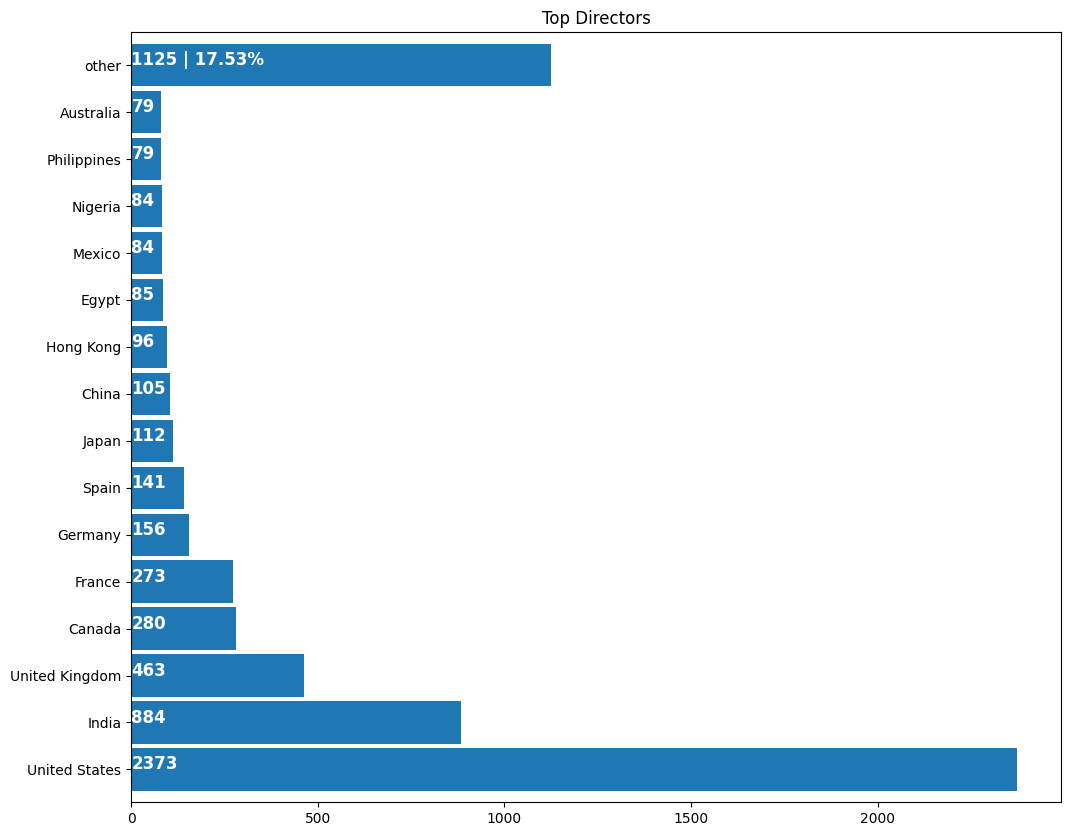

In [165]:
topArrPredictors(MovieData, 'country', 15, 'Top Directors', 1)

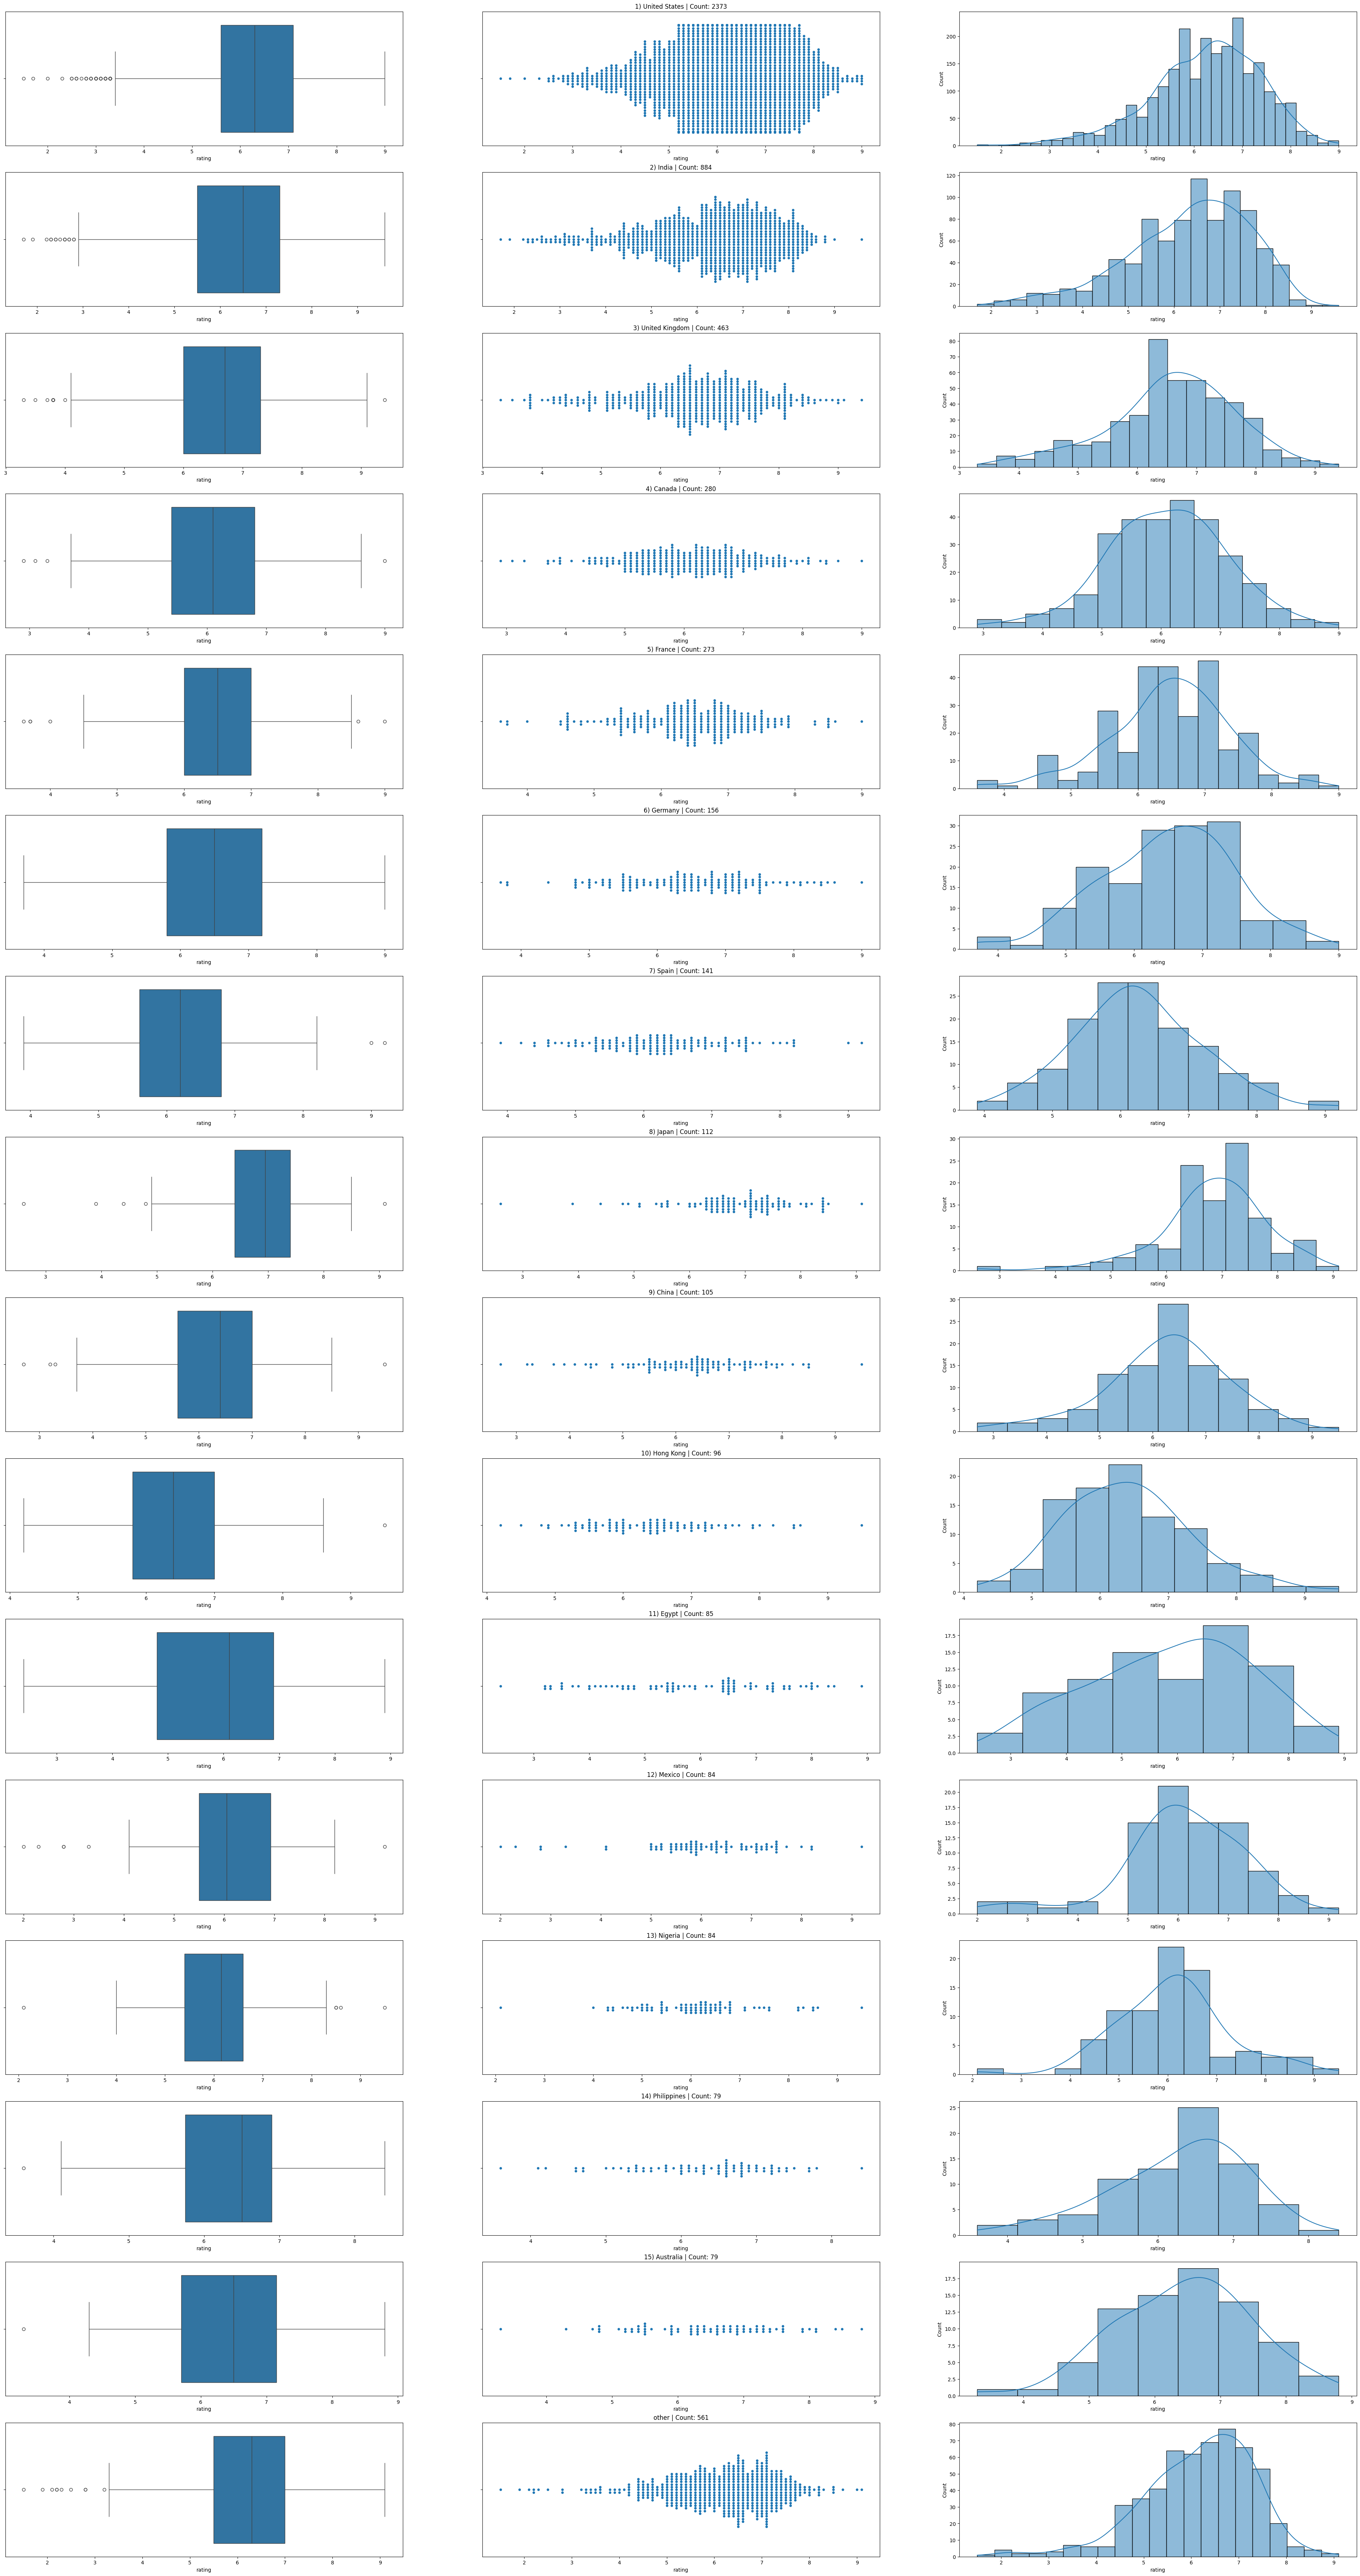

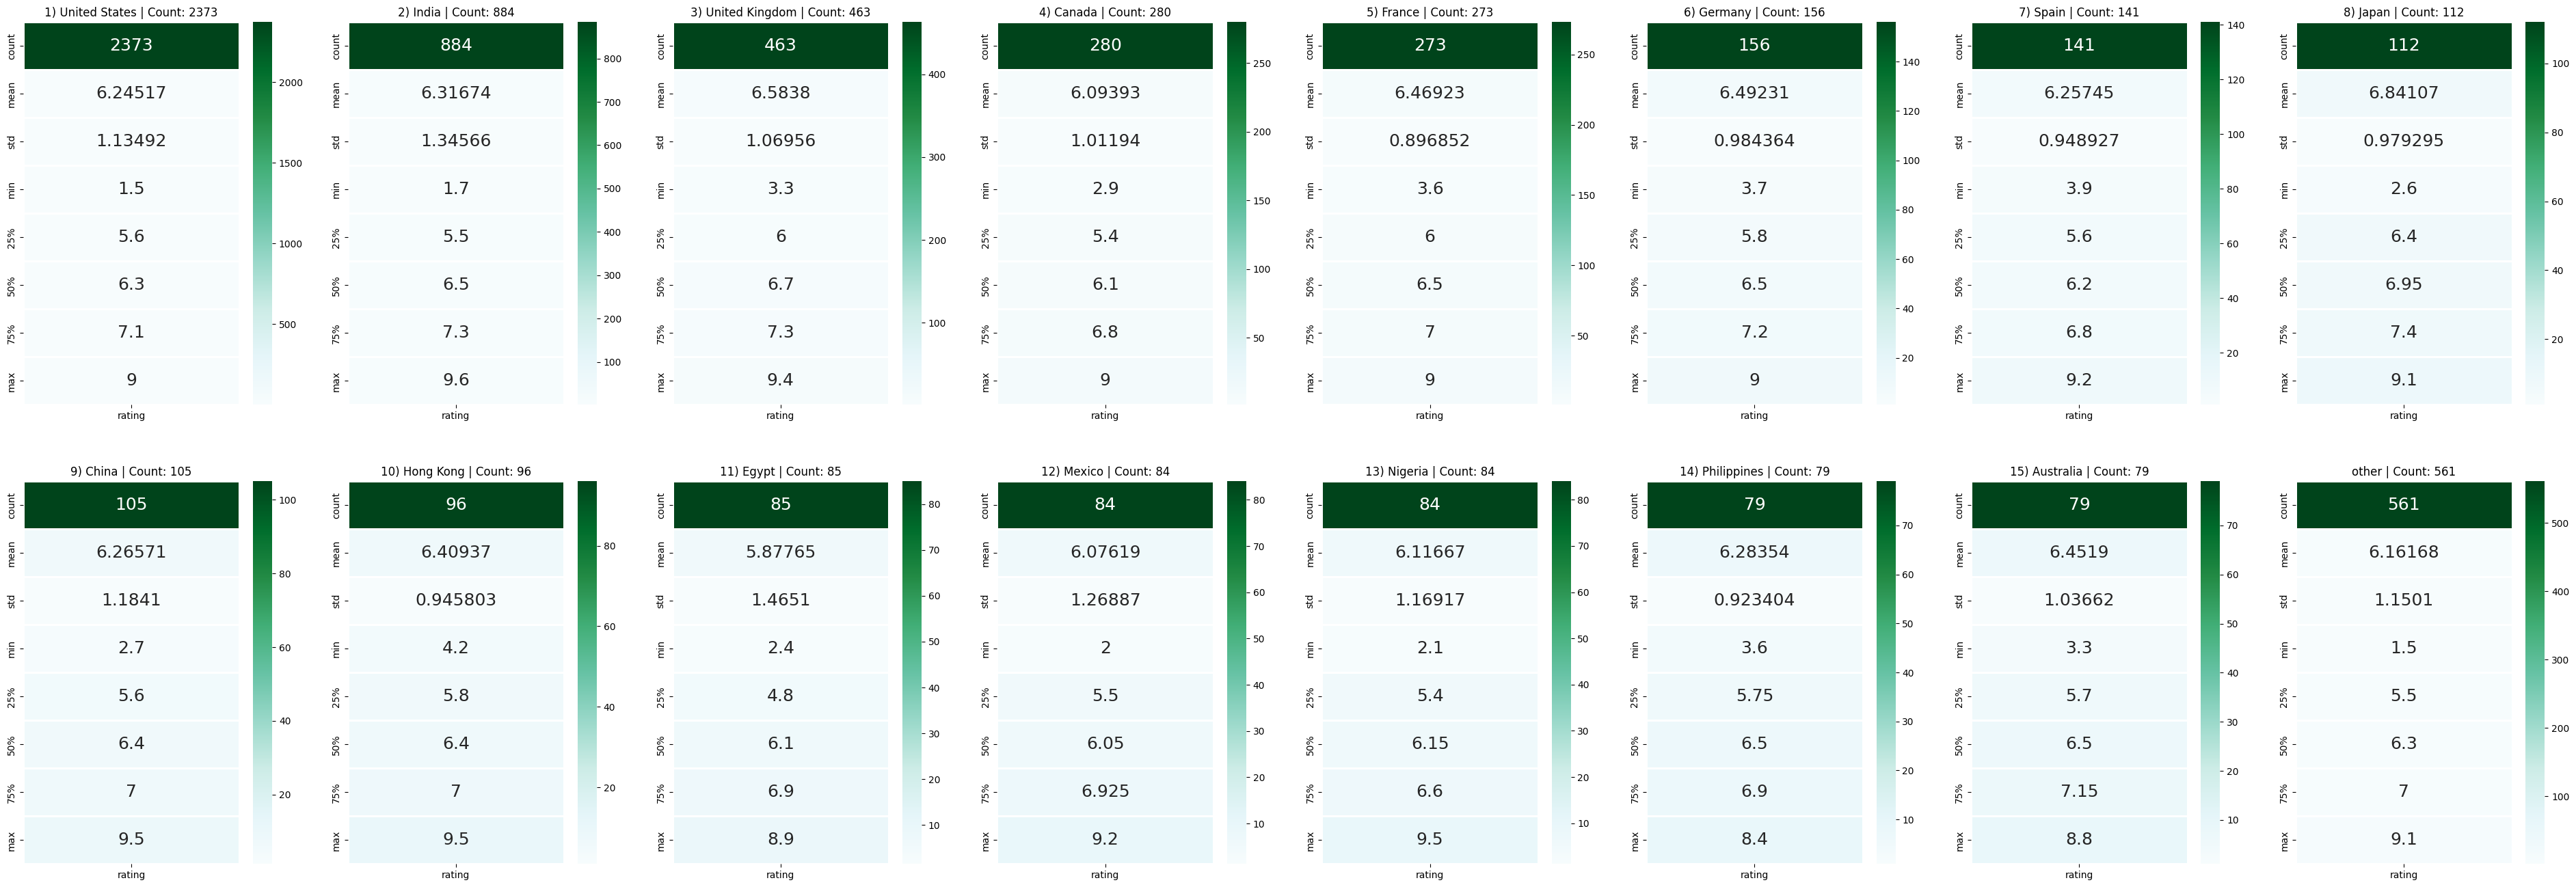

In [166]:
ArrPredictorsViz(MovieData, 'country', 'rating', 15, 1, 0)

#### We can see that there is quite a lot of variation between distributions of response [rating] with different [country], signifying that relation of the response variable and the (categorical) predictor variable. However, we will not be using [country] as a predictor as it has no meaningful implication
---

# 3) Visualization of Response
---

## Univariate Explroation of Response Variable


-------
Statistical Description:
-------
             rating
count  4955.000000
mean      6.260202
std       1.171019
min       1.500000
25%       5.600000
50%       6.400000
75%       7.100000
max       9.600000


show_id
s8       7.0
s9       8.6
s10      6.4
s13      5.5
s28      6.0
        ... 
s8800    7.0
s8802    6.6
s8803    7.7
s8805    7.5
s8807    6.1
Name: rating, Length: 4955, dtype: float64

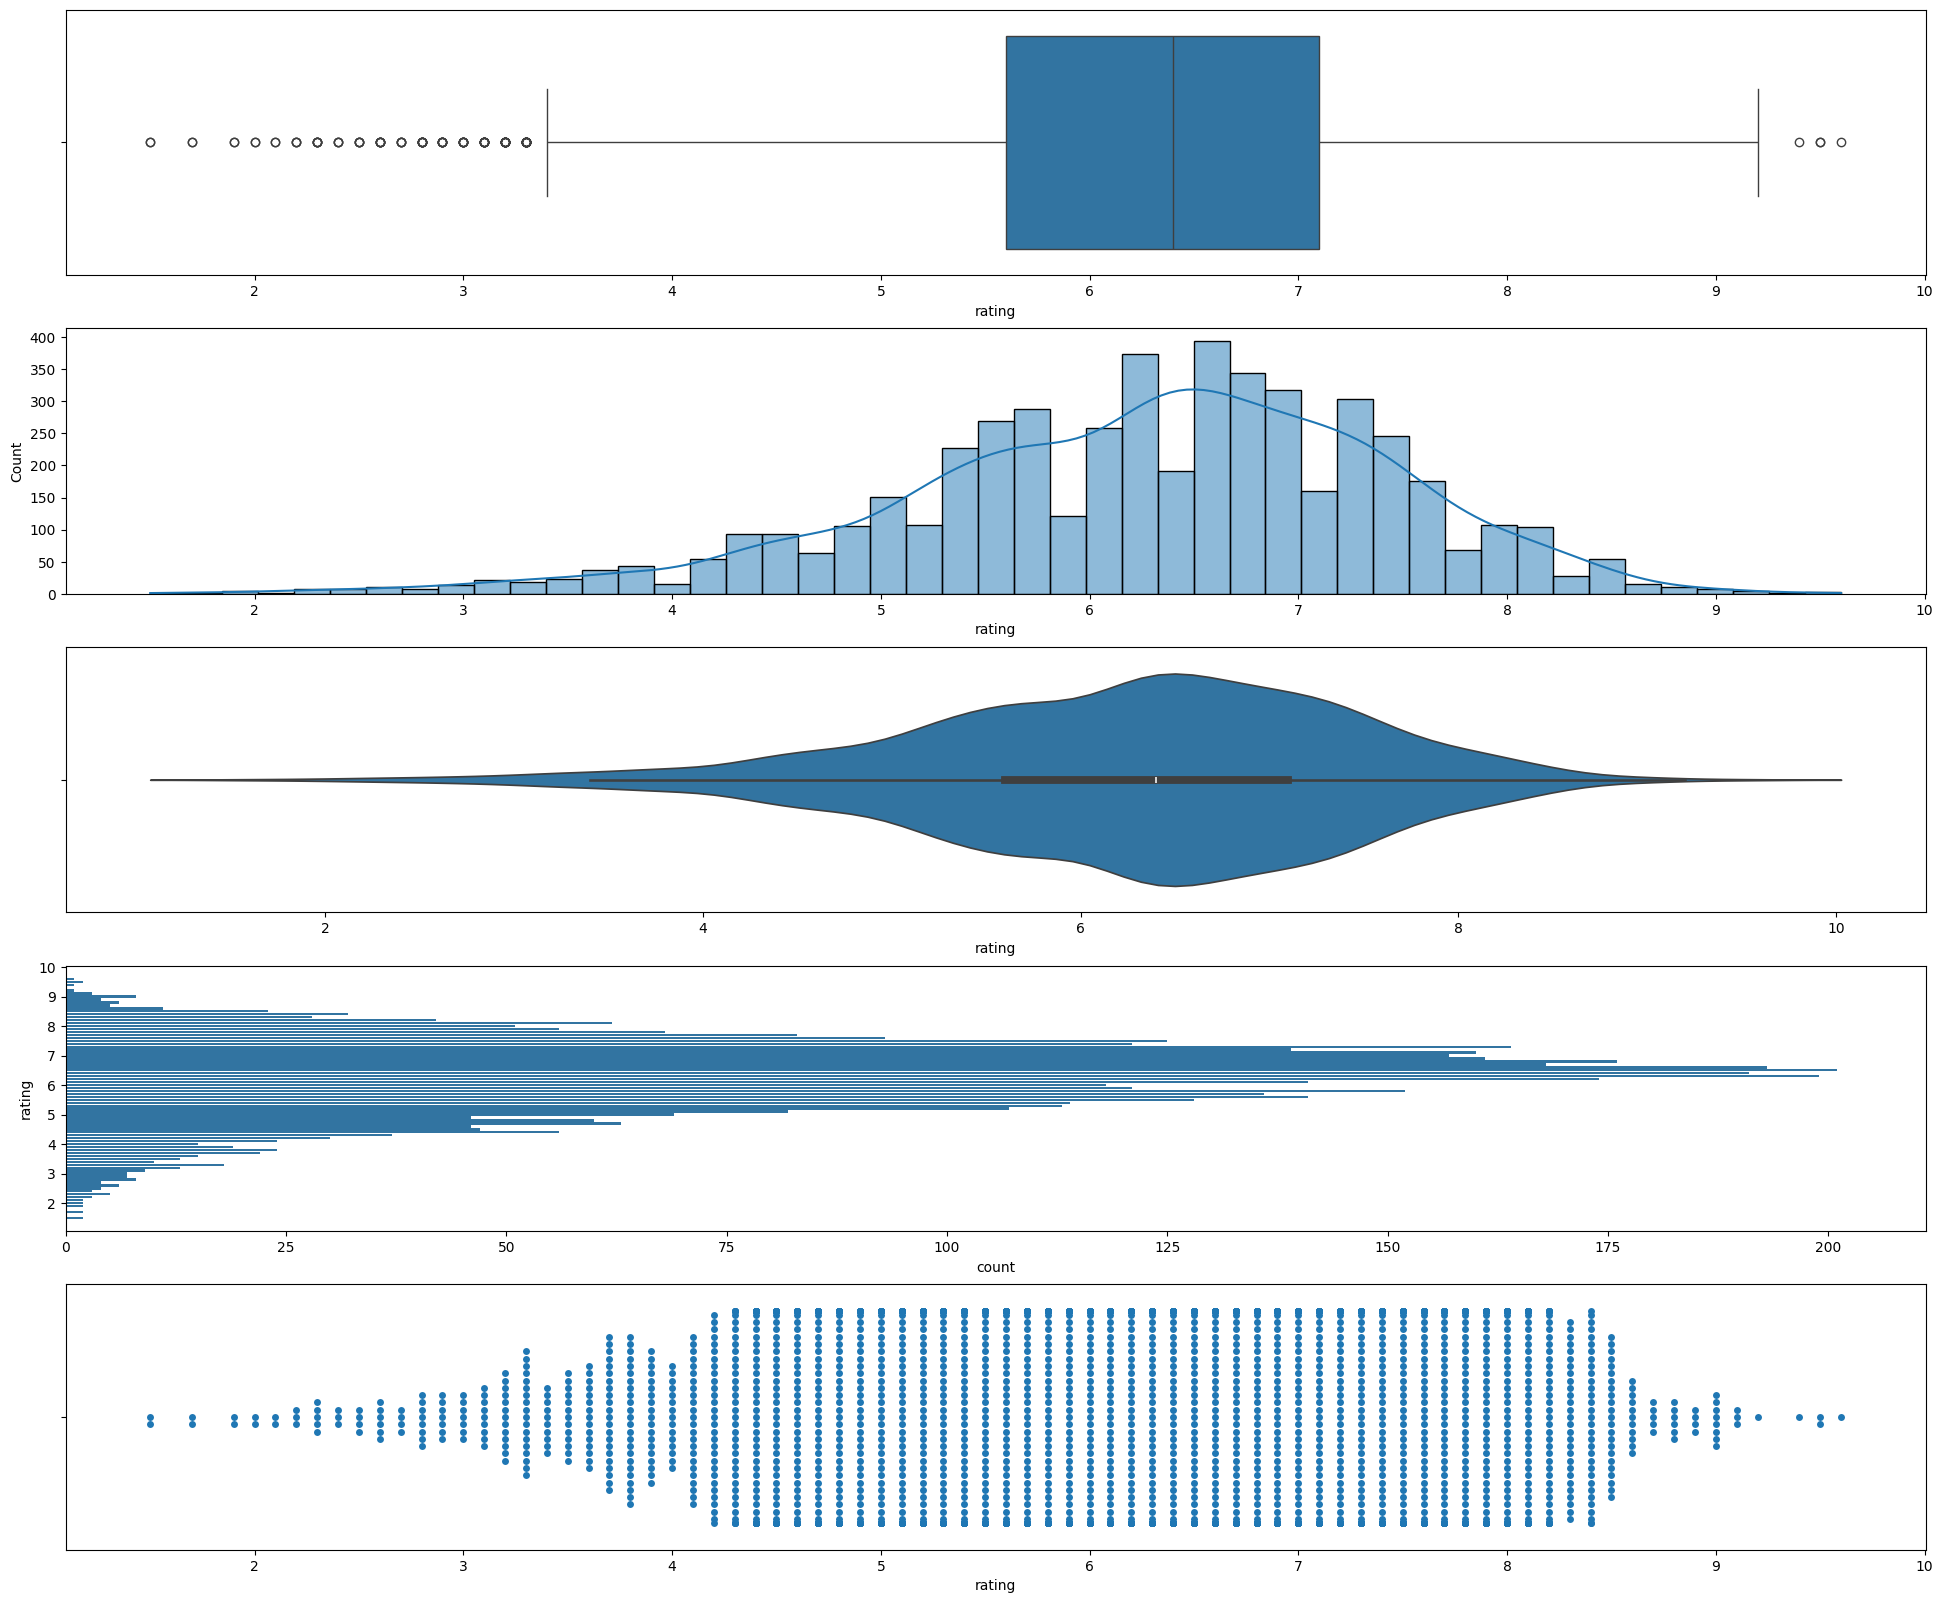

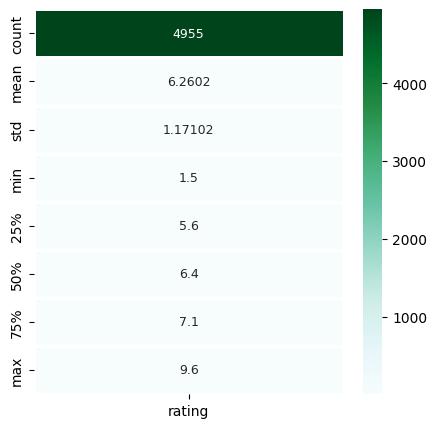

In [167]:
uniVarViz(MovieData, 'rating')